# This notebook contains the code used to create all of the plots in my $M_{BH}-\sigma$ paper

In [1]:
# Importing necessary packages
import sys
sys.path.append('/home/yja6qa/arepo_package/')

import arepo_package
import scipy.interpolate
import h5py
import os
import numpy as np
import plotting # Specific plotting preferences
from brahma_analysis_clean import *
from sklearn.linear_model import LinearRegression

%matplotlib inline

h = 0.6774

In [2]:
# Grabbing latex font for use on Rivanna
os.environ["MANPATH"] = "/standard/torrey-group/Share/texlive/2018/texmf-dist/doc/man:" + os.environ.get("MANPATH", "")
os.environ["INFOPATH"] = "/standard/torrey-group/Share/texlive/2018/texmf-dist/doc/info:" + os.environ.get("INFOPATH", "")
os.environ["PATH"] = "/standard/torrey-group/Share/texlive/2018/bin/x86_64-linux:/standard/torrey-group/Share/texlive/2018/texmf-dist:" + os.environ.get("PATH", "")

# Loading in data:

## Here are several relations and data points grabbed from other papers

In [4]:
# https://ui.adsabs.harvard.edu/abs/2013ARA%26A..51..511K/abstract
Korm_Ho_2013=np.array([1.7222222222222223, 5.980392156862745,1.8611111111111112, 6.568627450980392,1.9801587301587302, 7.098039215686274,2.0912698412698414, 7.568627450980392,2.1666666666666665, 7.901960784313726,2.253968253968254, 8.294117647058824,2.365079365079365, 8.784313725490197,2.492063492063492, 9.333333333333334,2.575396825396825, 9.686274509803923])

model=LinearRegression()

KH13_x = list(np.arange(0,len(Korm_Ho_2013)-2,2))
KH13_y=list(np.arange(1,len(Korm_Ho_2013)-1,2))

modelx=Korm_Ho_2013[KH13_x].reshape(-1, 1)
modely=Korm_Ho_2013[KH13_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit=np.linspace(0.75,2.5,100)
KH13_yfit=model.coef_*xfit + model.intercept_

Korm_Ho_M_Mstar=np.array([8.017615886326578, 5.212962962962962,8.274545772187281, 5.509259259259259,8.424935942231539, 5.685185185185185,8.581586303284416, 5.87037037037037,11.188358956440716, 8.916666666666666,10.724638947123225, 8.37962962962963,10.42388772420219, 8.018518518518519,9.809777544840438, 7.305555555555555,9.346057535522945, 6.768518518518518,9.045306312601909, 6.4074074074074066,8.731976473328675, 6.046296296296296,11.031679478220358, 8.74074074074074])

model=LinearRegression()

KH13_M_Mstar_x = list(np.arange(0,len(Korm_Ho_M_Mstar)-2,2))
KH13_M_Mstar_y=list(np.arange(1,len(Korm_Ho_M_Mstar)-1,2))

modelx=Korm_Ho_M_Mstar[KH13_M_Mstar_x].reshape(-1, 1)
modely=Korm_Ho_M_Mstar[KH13_M_Mstar_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit_M_Mstar=np.linspace(7,12,100)
KH13_M_Mstar_yfit=model.coef_*xfit_M_Mstar + model.intercept_

In [5]:
# https://ui.adsabs.harvard.edu/abs/2024A%26A...691A.145M/abstract
Maiolino_et_al = np.array([1.9268858800773696, 5.656560658539877,1.6406189555125728, 6.172349421978319,1.7705996131528048, 6.298367144977734,1.872727272727273, 6.564324591786245,1.7705996131528048, 7.693715982187037,1.642166344294004, 7.707210651792542,1.9067698259187622, 7.88941118258288,1.928433268858801, 7.493747469749449,1.9315280464216635, 7.284400161936036,1.9021276595744683, 7.238315865233234,1.8541586073500969, 7.2157572758760296,1.9593810444874276, 7.132832531150196,1.9500967117988397, 7.353897710404391,1.9485493230174082, 6.865548108497144,1.9222437137330757, 6.8194188295623235])

Maiolino_x = Maiolino_et_al[list(np.arange(0,len(Maiolino_et_al)-2,2))]
Maiolino_y = Maiolino_et_al[list(np.arange(1,len(Maiolino_et_al)-1,2))]


Maiolino_M_Mstar = np.array([8.884142790589332, 5.6574074074074066,8.894945259725134, 6.222222222222221,9.78185418122525, 6.185185185185185,10.177702073142324, 6.305555555555555,10.173334498020033, 7.694444444444444,10.650681341719077, 7.898148148148148,9.770760540414628, 7.712962962962963,8.878348474260424, 7.5,8.43256464011181, 7.259259259259259,8.331586303284416, 7.37037037037037,8.093058467272304, 7.222222222222221,8.048771255532262, 7.305555555555555,7.778855112974609, 7.138888888888888,7.8677789424644775, 6.861111111111111,8.113993710691824, 6.564814814814814,8.377329373398556, 6.824074074074074])

Maiolino_x_M_Mstar = Maiolino_M_Mstar[list(np.arange(0,len(Maiolino_M_Mstar)-2,2))]
Maiolino_y_M_Mstar = Maiolino_M_Mstar[list(np.arange(1,len(Maiolino_M_Mstar)-1,2))]


In [6]:
# https://ui.adsabs.harvard.edu/abs/2023ApJ...957L...3P/abstract
Pacucchi_et_al = np.array([7.466494845360824, 5.523809523809525,7.93041237113402, 6.015873015873016,8.231958762886597, 6.341269841269842,8.664948453608247, 6.801587301587302,9.11340206185567, 7.277777777777779,9.585051546391753, 7.7857142857142865,9.987113402061855, 8.214285714285715,10.38144329896907, 8.626984126984127,10.621134020618555, 8.88888888888889,10.984536082474227, 9.26984126984127])

model=LinearRegression()

Pacucchi_model_x = list(np.arange(0,len(Pacucchi_et_al)-2,2))
Pacucchi_model_y=list(np.arange(1,len(Pacucchi_et_al)-1,2))

modelx=Pacucchi_et_al[Pacucchi_model_x].reshape(-1, 1)
modely=Pacucchi_et_al[Pacucchi_model_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit_Pacucchi=np.linspace(5,12,100)
Pacucchi_yfit=model.coef_*xfit_Pacucchi + model.intercept_

## Loading in BRAHMA data:

In [7]:
bFOF_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_z0_decomp')
bFOF_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_z1_decomp')
bFOF_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_z2_decomp')
bFOF_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_z3_decomp')
bFOF_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_z4_decomp')
bFOF_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_z5_decomp')
bFOF_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_z6_decomp')
bFOF_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_z7_decomp')

LW10_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z0_decomp')
LW10_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z1_decomp')
LW10_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z2_decomp')
LW10_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z3_decomp')
LW10_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z4_decomp')
LW10_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z5_decomp')
LW10_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z6_decomp')
LW10_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z7_decomp')

spin_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z0_decomp')
spin_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z1_decomp')
spin_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z2_decomp')
spin_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z3_decomp')
spin_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z4_decomp')
spin_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z5_decomp')
spin_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z6_decomp')
spin_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z7_decomp')

rich_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z0_decomp')
rich_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z1_decomp')
rich_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z2_decomp')
rich_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z3_decomp')
rich_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z4_decomp')
rich_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z5_decomp')
rich_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z6_decomp')
rich_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z7_decomp')

In [8]:
# Storing the BH masses
MBH_decomp_bFOFz0 = np.array(bFOF_decomp_z0[5])
MBH_decomp_bFOFz1 = np.array(bFOF_decomp_z1[5])
MBH_decomp_bFOFz2 = np.array(bFOF_decomp_z2[5])
MBH_decomp_bFOFz3 = np.array(bFOF_decomp_z3[5])
MBH_decomp_bFOFz4 = np.array(bFOF_decomp_z4[5])
MBH_decomp_bFOFz5 = np.array(bFOF_decomp_z5[5])
MBH_decomp_bFOFz6 = np.array(bFOF_decomp_z6[5])
MBH_decomp_bFOFz7 = np.array(bFOF_decomp_z7[5])

MBH_decomp_LW10z0 = np.array(LW10_decomp_z0[5])
MBH_decomp_LW10z1 = np.array(LW10_decomp_z1[5])
MBH_decomp_LW10z2 = np.array(LW10_decomp_z2[5])
MBH_decomp_LW10z3 = np.array(LW10_decomp_z3[5])
MBH_decomp_LW10z4 = np.array(LW10_decomp_z4[5])
MBH_decomp_LW10z5 = np.array(LW10_decomp_z5[5])
MBH_decomp_LW10z6 = np.array(LW10_decomp_z6[5])
MBH_decomp_LW10z7 = np.array(LW10_decomp_z7[5])

MBH_decomp_spinz0 = np.array(spin_decomp_z0[5])
MBH_decomp_spinz1 = np.array(spin_decomp_z1[5])
MBH_decomp_spinz2 = np.array(spin_decomp_z2[5])
MBH_decomp_spinz3 = np.array(spin_decomp_z3[5])
MBH_decomp_spinz4 = np.array(spin_decomp_z4[5])
MBH_decomp_spinz5 = np.array(spin_decomp_z5[5])
MBH_decomp_spinz6 = np.array(spin_decomp_z6[5])
MBH_decomp_spinz7 = np.array(spin_decomp_z7[5])

MBH_decomp_richz0 = np.array(rich_decomp_z0[5])
MBH_decomp_richz1 = np.array(rich_decomp_z1[5])
MBH_decomp_richz2 = np.array(rich_decomp_z2[5])
MBH_decomp_richz3 = np.array(rich_decomp_z3[5])
MBH_decomp_richz4 = np.array(rich_decomp_z4[5])
MBH_decomp_richz5 = np.array(rich_decomp_z5[5])
MBH_decomp_richz6 = np.array(rich_decomp_z6[5])
MBH_decomp_richz7 = np.array(rich_decomp_z7[5])

In [9]:
# Storing the stellar masses
Mstar_decomp_bFOFz0 = np.array(bFOF_decomp_z0[6])
Mstar_decomp_bFOFz1 = np.array(bFOF_decomp_z1[6])
Mstar_decomp_bFOFz2 = np.array(bFOF_decomp_z2[6])
Mstar_decomp_bFOFz3 = np.array(bFOF_decomp_z3[6])
Mstar_decomp_bFOFz4 = np.array(bFOF_decomp_z4[6])
Mstar_decomp_bFOFz5 = np.array(bFOF_decomp_z5[6])
Mstar_decomp_bFOFz6 = np.array(bFOF_decomp_z6[6])
Mstar_decomp_bFOFz7 = np.array(bFOF_decomp_z7[6])

Mstar_decomp_LW10z0 = np.array(LW10_decomp_z0[6])
Mstar_decomp_LW10z1 = np.array(LW10_decomp_z1[6])
Mstar_decomp_LW10z2 = np.array(LW10_decomp_z2[6])
Mstar_decomp_LW10z3 = np.array(LW10_decomp_z3[6])
Mstar_decomp_LW10z4 = np.array(LW10_decomp_z4[6])
Mstar_decomp_LW10z5 = np.array(LW10_decomp_z5[6])
Mstar_decomp_LW10z6 = np.array(LW10_decomp_z6[6])
Mstar_decomp_LW10z7 = np.array(LW10_decomp_z7[6])

Mstar_decomp_spinz0 = np.array(spin_decomp_z0[6])
Mstar_decomp_spinz1 = np.array(spin_decomp_z1[6])
Mstar_decomp_spinz2 = np.array(spin_decomp_z2[6])
Mstar_decomp_spinz3 = np.array(spin_decomp_z3[6])
Mstar_decomp_spinz4 = np.array(spin_decomp_z4[6])
Mstar_decomp_spinz5 = np.array(spin_decomp_z5[6])
Mstar_decomp_spinz6 = np.array(spin_decomp_z6[6])
Mstar_decomp_spinz7 = np.array(spin_decomp_z7[6])

Mstar_decomp_richz0 = np.array(rich_decomp_z0[6])
Mstar_decomp_richz1 = np.array(rich_decomp_z1[6])
Mstar_decomp_richz2 = np.array(rich_decomp_z2[6])
Mstar_decomp_richz3 = np.array(rich_decomp_z3[6])
Mstar_decomp_richz4 = np.array(rich_decomp_z4[6])
Mstar_decomp_richz5 = np.array(rich_decomp_z5[6])
Mstar_decomp_richz6 = np.array(rich_decomp_z6[6])
Mstar_decomp_richz7 = np.array(rich_decomp_z7[6])

In [10]:
# Storing the bulge sigma's
Sigma_bulge_bFOFz0 = np.linalg.norm(bFOF_decomp_z0[1],axis=1)
Sigma_bulge_bFOFz1 = np.linalg.norm(bFOF_decomp_z1[1],axis=1)
Sigma_bulge_bFOFz2 = np.linalg.norm(bFOF_decomp_z2[1],axis=1)
Sigma_bulge_bFOFz3 = np.linalg.norm(bFOF_decomp_z3[1],axis=1)
Sigma_bulge_bFOFz4 = np.linalg.norm(bFOF_decomp_z4[1],axis=1)
Sigma_bulge_bFOFz5 = np.linalg.norm(bFOF_decomp_z5[1],axis=1)
Sigma_bulge_bFOFz6 = np.linalg.norm(bFOF_decomp_z6[1],axis=1)
Sigma_bulge_bFOFz7 = np.linalg.norm(bFOF_decomp_z7[1],axis=1)

Sigma_bulge_LW10z0 = np.linalg.norm(LW10_decomp_z0[1],axis=1)
Sigma_bulge_LW10z1 = np.linalg.norm(LW10_decomp_z1[1],axis=1)
Sigma_bulge_LW10z2 = np.linalg.norm(LW10_decomp_z2[1],axis=1)
Sigma_bulge_LW10z3 = np.linalg.norm(LW10_decomp_z3[1],axis=1)
Sigma_bulge_LW10z4 = np.linalg.norm(LW10_decomp_z4[1],axis=1)
Sigma_bulge_LW10z5 = np.linalg.norm(LW10_decomp_z5[1],axis=1)
Sigma_bulge_LW10z6 = np.linalg.norm(LW10_decomp_z6[1],axis=1)
Sigma_bulge_LW10z7 = np.linalg.norm(LW10_decomp_z7[1],axis=1)

Sigma_bulge_spinz0 = np.linalg.norm(spin_decomp_z0[1],axis=1)
Sigma_bulge_spinz1 = np.linalg.norm(spin_decomp_z1[1],axis=1)
Sigma_bulge_spinz2 = np.linalg.norm(spin_decomp_z2[1],axis=1)
Sigma_bulge_spinz3 = np.linalg.norm(spin_decomp_z3[1],axis=1)
Sigma_bulge_spinz4 = np.linalg.norm(spin_decomp_z4[1],axis=1)
Sigma_bulge_spinz5 = np.linalg.norm(spin_decomp_z5[1],axis=1)
Sigma_bulge_spinz6 = np.linalg.norm(spin_decomp_z6[1],axis=1)
Sigma_bulge_spinz7 = np.linalg.norm(spin_decomp_z7[1],axis=1)

Sigma_bulge_richz0 = np.linalg.norm(rich_decomp_z0[1],axis=1)
Sigma_bulge_richz1 = np.linalg.norm(rich_decomp_z1[1],axis=1)
Sigma_bulge_richz2 = np.linalg.norm(rich_decomp_z2[1],axis=1)
Sigma_bulge_richz3 = np.linalg.norm(rich_decomp_z3[1],axis=1)
Sigma_bulge_richz4 = np.linalg.norm(rich_decomp_z4[1],axis=1)
Sigma_bulge_richz5 = np.linalg.norm(rich_decomp_z5[1],axis=1)
Sigma_bulge_richz6 = np.linalg.norm(rich_decomp_z6[1],axis=1)
Sigma_bulge_richz7 = np.linalg.norm(rich_decomp_z7[1],axis=1)

## Loading in Illustris/IllustrisTNG data:

In [10]:
TNGz0_0 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_0')
TNGz0_1 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_2000')
TNGz0_2 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_4000')
TNGz0_3 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_6000')
TNGz0_4 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_8000')
TNGz0_5 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_10000')
TNGz0_6 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_12000')
TNGz0_7 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_14000')
TNGz0_8 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_16000')
TNGz0_9 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_18000')
TNGz5 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z5')

Illz0_0 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_0')
Illz0_1 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_2000')
Illz0_2 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_4000')
Illz0_3 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_6000')
Illz0_4 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_8000')
Illz0_5 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_10000')
Illz0_6 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_12000')
Illz0_7 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_14000')
Illz0_8 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_16000')
Illz0_9 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_18000')
Illz0_10 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_20000')
Illz0_11 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_22000')
Illz0_12 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_24000')
Illz0_13 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z0_26000')
Illz5 = ReadBrahmaData('Brahma_Data/Kin_Decomp_Ill_z5')

TNG_z0_sigmas = np.linalg.norm(np.concatenate((TNGz0_0[0],TNGz0_1[0],TNGz0_2[0],TNGz0_3[0],TNGz0_4[0],TNGz0_5[0],TNGz0_6[0],
                                               TNGz0_7[0],TNGz0_8[0],TNGz0_9[0])), axis=1 )
Ill_z0_sigmas = np.linalg.norm(np.concatenate((Illz0_0[0],Illz0_1[0],Illz0_2[0],Illz0_3[0],Illz0_4[0],Illz0_5[0],Illz0_6[0],
                                               Illz0_7[0],Illz0_8[0],Illz0_9[0],Illz0_10[0],Illz0_11[0],Illz0_12[0],Illz0_13[0])), axis=1 )
TNG_z0_BHs = np.concatenate((TNGz0_0[1],TNGz0_1[1],TNGz0_2[1],TNGz0_3[1],TNGz0_4[1],TNGz0_5[1],TNGz0_6[1],TNGz0_7[1],TNGz0_8[1],TNGz0_9[1]))
Ill_z0_BHs = np.concatenate((Illz0_0[1],Illz0_1[1],Illz0_2[1],Illz0_3[1],Illz0_4[1],Illz0_5[1],Illz0_6[1],Illz0_7[1],Illz0_8[1],Illz0_9[1],
                            Illz0_10[1],Illz0_11[1],Illz0_12[1],Illz0_13[1]))
TNG_z0_Mstars = np.concatenate((TNGz0_0[2],TNGz0_1[2],TNGz0_2[2],TNGz0_3[2],TNGz0_4[2],TNGz0_5[2],TNGz0_6[2],TNGz0_7[2],TNGz0_8[2],TNGz0_9[2]))
Ill_z0_Mstars = np.concatenate((Illz0_0[2],Illz0_1[2],Illz0_2[2],Illz0_3[2],Illz0_4[2],Illz0_5[2],Illz0_6[2],Illz0_7[2],Illz0_8[2],Illz0_9[2],
                            Illz0_10[2],Illz0_11[2],Illz0_12[2],Illz0_13[2]))

TNG_z5_sigmas = np.linalg.norm(TNGz5[0],axis=1)
TNG_z5_BHs = np.array(TNGz5[1])
TNG_z5_Mstars = np.array(TNGz5[2])

Ill_z5_sigmas = np.linalg.norm(Illz5[0],axis=1)
Ill_z5_BHs = np.array(Illz5[1])
Ill_z5_Mstars = np.array(Illz5[2])

# BH number density plot

In [53]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_' # Base name included in every box
box='bFOF'
basePath = path_to_output+run+output+box # Combining paths to read data in 
desired_redshift = 0
file_format='fof_subfind'

output_redshift,output_snapshot=arepo_package.desired_redshift_to_output_redshift(basePath,
                                                                    desired_redshift,list_all=False,file_format=file_format)
hdr  = il.groupcat.loadHeader(basePath, output_snapshot)
h = hdr['HubbleParam'] ## load in h from the header
box_size = hdr['BoxSize']

In [54]:
# Setting path and constants for this job
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_' # Base name included in every box

# A few settings/constants:
kpc2km=3.0857e16 # Conversion from kpc to km for units

# Change these!
boxes = ['bFOF','bFOF_LW10','bFOF_LW10_spin','bFOF_LW10_spin_rich'] # Name of the box we want to load data from
desired_redshifts=np.arange(30) # Redshift of box that I want

n_BHs = {}

for box in boxes:
    basePath = path_to_output+run+output+box # Combining paths to read data in 

    n = []
    for z in desired_redshifts:
        SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',z,postprocessed=1)
        SubhaloBHLen = SubhaloLenType[:,5]
        # a = 1/(1+z)
        volume = (1e-3*box_size/h)**3 # Converting to cMpc from ckpc/h
        n.append(np.sum(SubhaloBHLen)/volume)
        
    n_BHs[box] = n

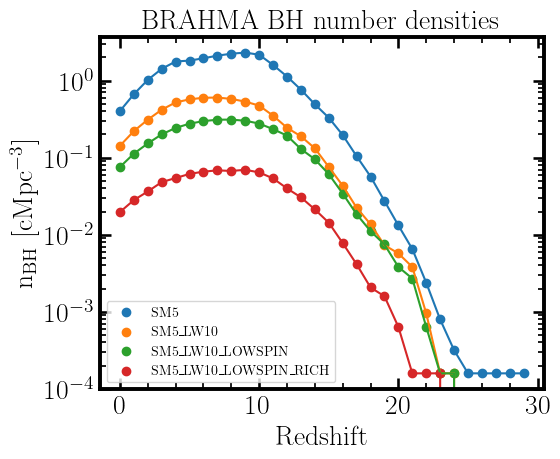

In [55]:
plt.figure(figsize=(6,5))
boxnames = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

for i in range(len(boxes)):
    plt.scatter(desired_redshifts,n_BHs[boxes[i]],label=boxnames[i])    
    plt.plot(desired_redshifts,n_BHs[boxes[i]]) 

plt.yscale('log')
plt.legend(fontsize=10)
plt.ylabel(r'$\mathrm{n_{BH}\ [cMpc^{-3}]}$')
plt.xlabel('Redshift')
plt.title('BRAHMA BH number densities',size=20)
plt.tight_layout()
plt.savefig('Plots/Paper_Figs/Brahma_BH_n.pdf',bbox_inches='tight')

# Full scatter $M_{BH}-M_*$ plot

In [11]:
# List of BH Masses
Prop2list=[[np.array(MBH_decomp_bFOFz5),np.array(MBH_decomp_bFOFz0)],[np.array(MBH_decomp_richz5),np.array(MBH_decomp_richz0)]]

# List of Stellar masses
Prop1list=[[np.array(Mstar_decomp_bFOFz5),np.array(Mstar_decomp_bFOFz0)],[np.array(Mstar_decomp_richz5),np.array(Mstar_decomp_richz0)]]

# Limits for making plot in log space
limitsMstar=[6.4,11.5]

redshifts=[5,0]
AllBoxMeans,AllBoxIQRs,Xpoints = median_trends_adj(Prop1list,Prop2list,redshifts,limitsMstar,bins=10)

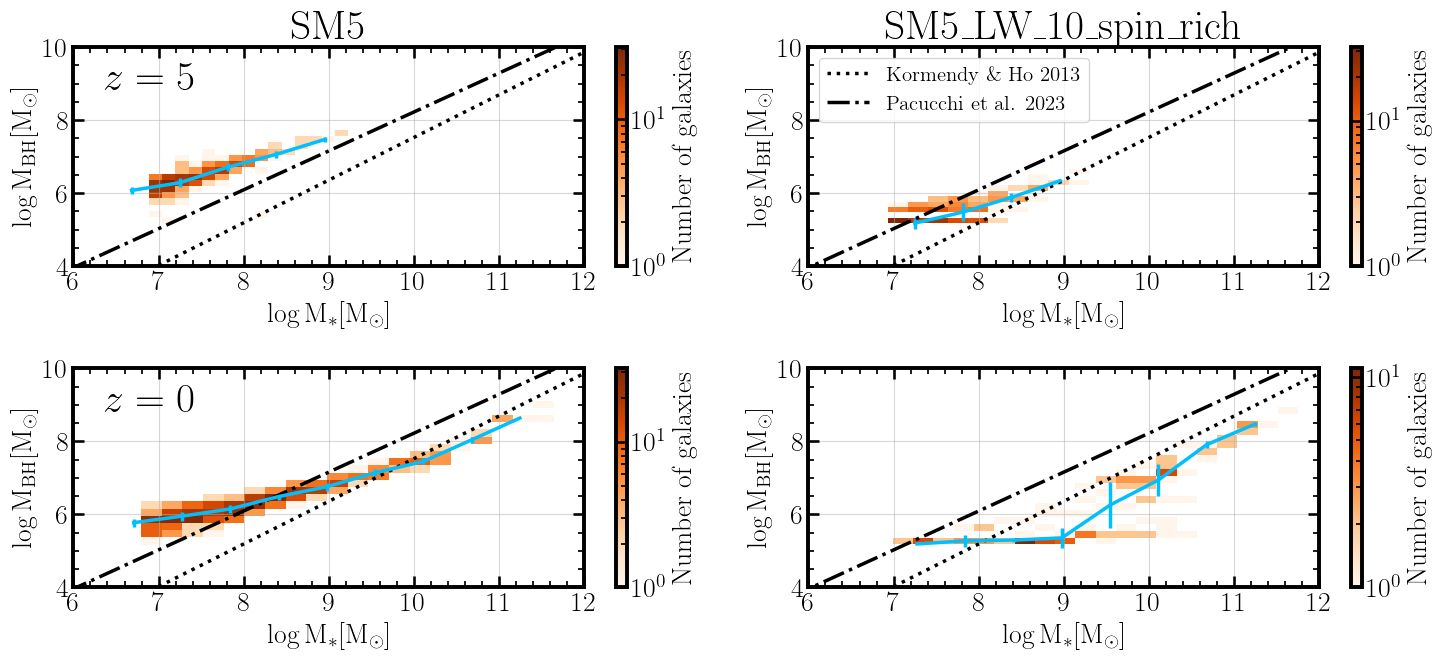

In [12]:
fig,axs = plt.subplots(2,2,figsize=(15,7))

counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(np.log10(Mstar_decomp_bFOFz5),np.log10(MBH_decomp_bFOFz5),
                                               norm='log',bins=(15,15),cmap='Oranges')
counts2, xedges2, yedges2, im2 = axs[1,0].hist2d(np.log10(Mstar_decomp_bFOFz0),np.log10(MBH_decomp_bFOFz0),
                                               norm='log',bins=(20,20),cmap='Oranges')

counts3, xedges3, yedges3, im3 = axs[0,1].hist2d(np.log10(Mstar_decomp_richz5),np.log10(MBH_decomp_richz5),
                                               norm='log',bins=(10,10),cmap='Oranges')
counts4, xedges4, yedges4, im4 = axs[1,1].hist2d(np.log10(Mstar_decomp_richz0),np.log10(MBH_decomp_richz0),
                                               norm='log',bins=(20,20),cmap='Oranges')
for i in range(2):
    for ii in range(2):
        axs[ii,i].errorbar(Xpoints[ii],AllBoxMeans[i,ii],yerr = AllBoxIQRs[i,ii],color='deepskyblue',lw=2.5)

axs[0,0].text(0.15, 0.85, r'$z=5$', horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes,size=30)
axs[1,0].text(0.15, 0.85, r'$z=0$', horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes,size=30)

for ax in axs.flatten():
    ax.grid(alpha=0.5)
    ax.plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],label=r'Kormendy \& Ho 2013',ls='dotted',lw=2.5,alpha=1,color='black')
    ax.plot(xfit_Pacucchi,Pacucchi_yfit[0],label=r'Pacucchi et al. 2023',ls='dashdot',lw=2.5,alpha=1,color='black')
    ax.set_xlim(6,12)
    ax.set_ylim(4,10)
    ax.set_xlabel(r'$\mathrm{\log M_{*} [M_{\odot}]}$',size=20)
    ax.set_ylabel(r'$\mathrm{\log M_{BH} [M_{\odot}]}$',size=20)

axs[0,0].set_title('SM5',size=30)
axs[0,1].set_title(r'SM5_LW_10_spin_rich',size=30)
axs[0,1].legend(fontsize=15,loc=2)
fig.colorbar(im1, ax=axs[0,0],label='Number of galaxies')
fig.colorbar(im2, ax=axs[1,0],label='Number of galaxies')
fig.colorbar(im3, ax=axs[0,1],label='Number of galaxies')
fig.colorbar(im4, ax=axs[1,1],label='Number of galaxies')

fig.tight_layout()
fig.savefig('Plots/Paper_Figs/SM5_spin_MBH_Mstar_hist2d.pdf')

# Mega plot with 3 scaling relations for each simulation

### M-sigma portion:

In [11]:
# List of sigmas
Prop1list=[[Sigma_bulge_bFOFz7,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz4,Sigma_bulge_bFOFz3,
            Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz0],
          [Sigma_bulge_LW10z7,Sigma_bulge_LW10z6,Sigma_bulge_LW10z5,Sigma_bulge_LW10z4,Sigma_bulge_LW10z3,
           Sigma_bulge_LW10z2,Sigma_bulge_LW10z1,Sigma_bulge_LW10z0],
          [Sigma_bulge_spinz7,Sigma_bulge_spinz6,Sigma_bulge_spinz5,Sigma_bulge_spinz4,Sigma_bulge_spinz3,
           Sigma_bulge_spinz2,Sigma_bulge_spinz1,Sigma_bulge_spinz0],
          [Sigma_bulge_richz7,Sigma_bulge_richz6,Sigma_bulge_richz5,Sigma_bulge_richz4,Sigma_bulge_richz3,
           Sigma_bulge_richz2,Sigma_bulge_richz1,Sigma_bulge_richz0]]

# List of BH Masses
Prop2list=[[MBH_decomp_bFOFz7,MBH_decomp_bFOFz6,MBH_decomp_bFOFz5,MBH_decomp_bFOFz4,MBH_decomp_bFOFz3,MBH_decomp_bFOFz2,
            MBH_decomp_bFOFz1,MBH_decomp_bFOFz0],
           [MBH_decomp_LW10z7,MBH_decomp_LW10z6,MBH_decomp_LW10z5,MBH_decomp_LW10z4,MBH_decomp_LW10z3,MBH_decomp_LW10z2,
            MBH_decomp_LW10z1,MBH_decomp_LW10z0],
           [MBH_decomp_spinz7,MBH_decomp_spinz6,MBH_decomp_spinz5,MBH_decomp_spinz4,MBH_decomp_spinz3,MBH_decomp_spinz2,
            MBH_decomp_spinz1,MBH_decomp_spinz0],
           [MBH_decomp_richz7,MBH_decomp_richz6,MBH_decomp_richz5,MBH_decomp_richz4,MBH_decomp_richz3,MBH_decomp_richz2,
            MBH_decomp_richz1,MBH_decomp_richz0]]

# Limits for making plot in log space
limits=[1,2.4]

In [12]:
redshifts=[7,6,5,4,3,2,1,0]
MsigmaMeans,MsigmaIQRs,MsigmaXpoints = median_trends_adj(Prop1list,Prop2list,redshifts,limits,bins=8)

/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:145: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:146: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]


In [13]:
# Binning as above for Illustris and Illustris TNG
IllProp1 = [[Ill_z5_sigmas,Ill_z0_sigmas],[TNG_z5_sigmas,TNG_z0_sigmas]]
IllProp2 = [[Ill_z5_BHs,Ill_z0_BHs],[TNG_z5_BHs,TNG_z0_BHs]]

redshiftIll = [5,0]
limitsTNG=[0.6,2.7]
Msigma_TNG_means,Msigma_TNG_IQRs,Msigma_TNG_Xpoints = median_trends(IllProp1,IllProp2,redshiftIll,limitsTNG,bins=10)

/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:73: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:74: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]


### M-Mstar portion

In [32]:
# List of stellar masses
Prop1list=[[Mstar_decomp_bFOFz7,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz4,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz2,
           Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz0],
           
           [Mstar_decomp_LW10z7,Mstar_decomp_LW10z6,Mstar_decomp_LW10z5,Mstar_decomp_LW10z4,Mstar_decomp_LW10z3,Mstar_decomp_LW10z2,
            Mstar_decomp_LW10z1,Mstar_decomp_LW10z0],
           
           [Mstar_decomp_spinz7,Mstar_decomp_spinz6,Mstar_decomp_spinz5,Mstar_decomp_spinz4,Mstar_decomp_spinz3,Mstar_decomp_spinz2,
            Mstar_decomp_spinz1,Mstar_decomp_spinz0],
           
           [Mstar_decomp_richz7,Mstar_decomp_richz6,Mstar_decomp_richz5,Mstar_decomp_richz4,Mstar_decomp_richz3,Mstar_decomp_richz2,
            Mstar_decomp_richz1,Mstar_decomp_richz0]]

# List of BH Masses
Prop2list=[[MBH_decomp_bFOFz7,MBH_decomp_bFOFz6,MBH_decomp_bFOFz5,MBH_decomp_bFOFz4,MBH_decomp_bFOFz3,MBH_decomp_bFOFz2,
            MBH_decomp_bFOFz1,MBH_decomp_bFOFz0],
           [MBH_decomp_LW10z7,MBH_decomp_LW10z6,MBH_decomp_LW10z5,MBH_decomp_LW10z4,MBH_decomp_LW10z3,MBH_decomp_LW10z2,
            MBH_decomp_LW10z1,MBH_decomp_LW10z0],
           [MBH_decomp_spinz7,MBH_decomp_spinz6,MBH_decomp_spinz5,MBH_decomp_spinz4,MBH_decomp_spinz3,MBH_decomp_spinz2,
            MBH_decomp_spinz1,MBH_decomp_spinz0],
           [MBH_decomp_richz7,MBH_decomp_richz6,MBH_decomp_richz5,MBH_decomp_richz4,MBH_decomp_richz3,MBH_decomp_richz2,
            MBH_decomp_richz1,MBH_decomp_richz0]]

# Limits for making plot in log space
limitsMstar=[6.4,11.5]

In [33]:
redshifts=[7,6,5,4,3,2,1,0]
MMstarMeans,MMstarIQRs,MMstarXpoints = median_trends_adj(Prop1list,Prop2list,redshifts,limitsMstar,bins=10)

In [16]:
# Binning as above for Illustris and Illustris TNG
IllProp1 = [[Ill_z5_Mstars,Ill_z0_Mstars],[TNG_z5_Mstars,TNG_z0_Mstars]]
IllProp2 = [[Ill_z5_BHs,Ill_z0_BHs],[TNG_z5_BHs,TNG_z0_BHs]]

redshiftIll = [5,0]
limitsMstarTNG=[6.4,12.3]
MMstar_TNG_means,MMstar_TNG_IQRs,MMstar_TNG_Xpoints = median_trends(IllProp1,IllProp2,redshiftIll,limitsMstarTNG,bins=15)

### Mstar - sigma portion:

In [18]:
# List of sigmas
Prop1list=[[Sigma_bulge_bFOFz7,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz4,Sigma_bulge_bFOFz3,
            Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz0],
          [Sigma_bulge_LW10z7,Sigma_bulge_LW10z6,Sigma_bulge_LW10z5,Sigma_bulge_LW10z4,Sigma_bulge_LW10z3,
           Sigma_bulge_LW10z2,Sigma_bulge_LW10z1,Sigma_bulge_LW10z0],
          [Sigma_bulge_spinz7,Sigma_bulge_spinz6,Sigma_bulge_spinz5,Sigma_bulge_spinz4,Sigma_bulge_spinz3,
           Sigma_bulge_spinz2,Sigma_bulge_spinz1,Sigma_bulge_spinz0],
          [Sigma_bulge_richz7,Sigma_bulge_richz6,Sigma_bulge_richz5,Sigma_bulge_richz4,Sigma_bulge_richz3,
           Sigma_bulge_richz2,Sigma_bulge_richz1,Sigma_bulge_richz0]]

# List of stellar masses
Prop2list=[[Mstar_decomp_bFOFz7,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz4,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz2,
           Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz0],
           
           [Mstar_decomp_LW10z7,Mstar_decomp_LW10z6,Mstar_decomp_LW10z5,Mstar_decomp_LW10z4,Mstar_decomp_LW10z3,Mstar_decomp_LW10z2,
            Mstar_decomp_LW10z1,Mstar_decomp_LW10z0],
           
           [Mstar_decomp_spinz7,Mstar_decomp_spinz6,Mstar_decomp_spinz5,Mstar_decomp_spinz4,Mstar_decomp_spinz3,Mstar_decomp_spinz2,
            Mstar_decomp_spinz1,Mstar_decomp_spinz0],
           
           [Mstar_decomp_richz7,Mstar_decomp_richz6,Mstar_decomp_richz5,Mstar_decomp_richz4,Mstar_decomp_richz3,Mstar_decomp_richz2,
            Mstar_decomp_richz1,Mstar_decomp_richz0]]

# Limits for making plot in log space
limits=[1,2.4]

In [19]:
redshifts=[7,6,5,4,3,2,1,0]
MstarsigmaMeans,MstarsigmaIQRs,MstarsigmaXpoints = median_trends_adj(Prop1list,Prop2list,redshifts,limits,bins=10)

In [20]:
# Binning as above for Illustris and Illustris TNG
IllProp1 = [[Ill_z5_sigmas,Ill_z0_sigmas],[TNG_z5_sigmas,TNG_z0_sigmas]]
IllProp2 = [[Ill_z5_Mstars,Ill_z0_Mstars],[TNG_z5_Mstars,TNG_z0_Mstars]]

redshiftIll = [5,0]
Mstarsigma_TNG_means,Mstarsigma_TNG_IQRs,Mstarsigma_TNG_Xpoints = median_trends(IllProp1,IllProp2,redshiftIll,limitsTNG,bins=10)

### Now plotting:

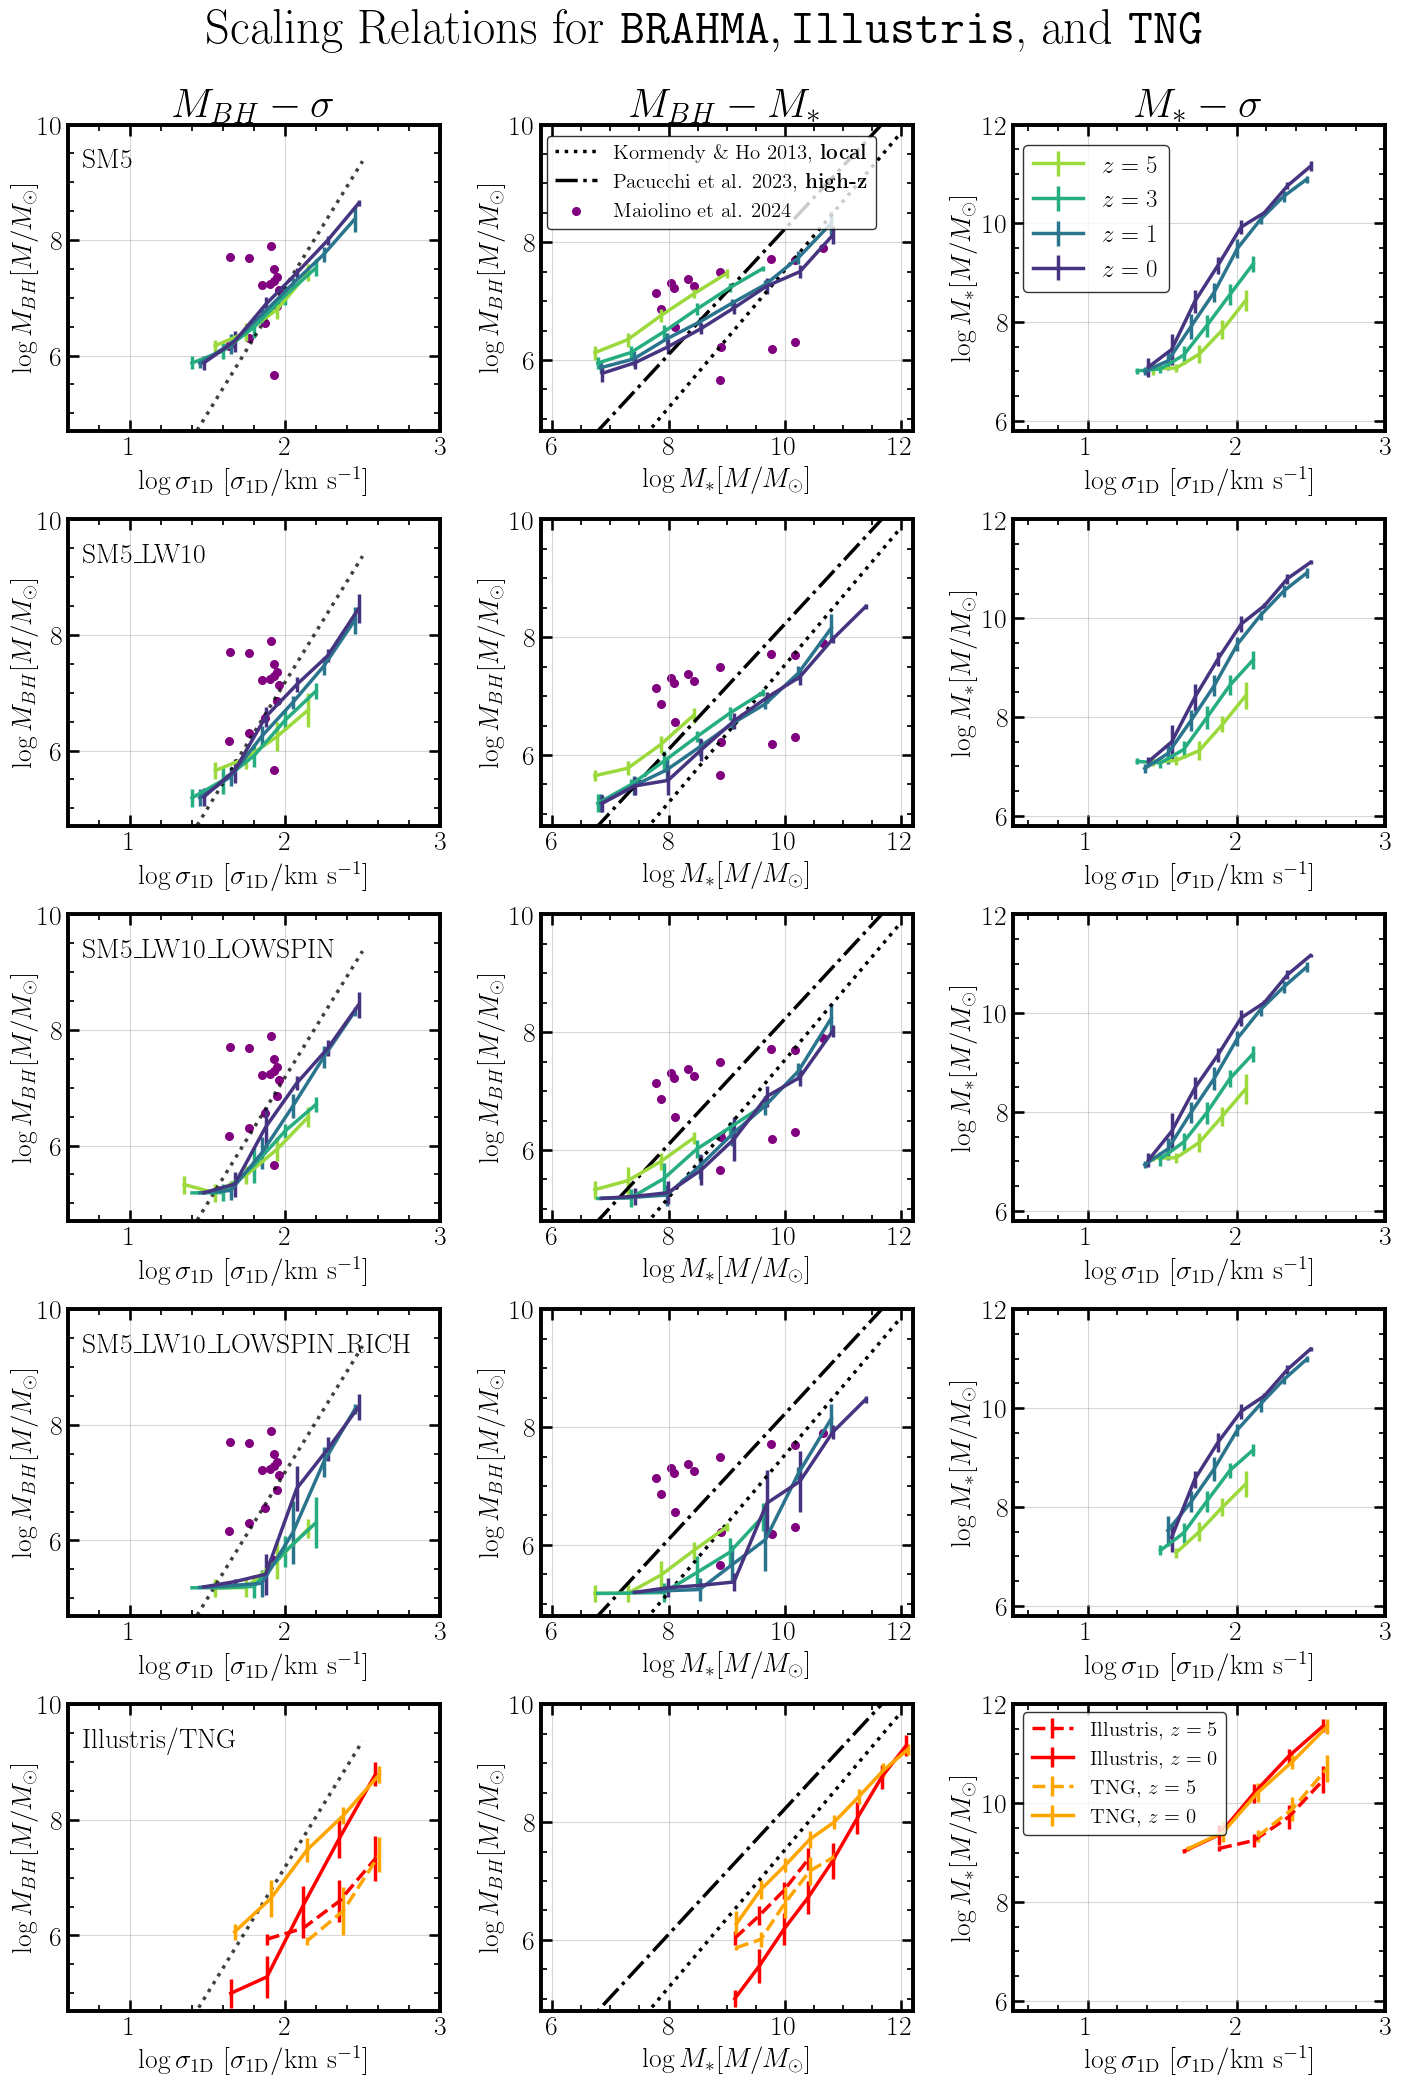

In [32]:
legend_names = ['$z=7$','$z=6$','$z=5$','$z=4$','$z=3$','$z=2$','$z=1$','$z=0$',]
cmap = plt.get_cmap('viridis')
axislabels = [r'$Log_{10}\ \sigma_x [km\ s^{-1}]$',r'$Log_{10}\ M_{*} [M_{\odot}]$ ']
titles=['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH','Illustris/TNG']
relations = [r'$M_{BH}-\sigma$',r'$M_{BH}-M_*$',r'$M_*-\sigma$']
label_font_size=25

fig,axs = plt.subplots(5,3,figsize = (17,23))

plt.subplots_adjust(wspace=0.27, hspace=0.29) 

zs = np.abs(7 - np.array([5,3,1,0]))

# Plotting M-sigma: MsigmaMeans,MsigmaStdDevs,MsigmaXpoints

for i in range(4):
    for ii in range(len(zs)): # Only selecting z = 5,3,1,0
        axs[i,0].errorbar(MsigmaXpoints[zs[ii]],MsigmaMeans[i,zs[ii]],yerr = MsigmaIQRs[i,zs[ii]],
                                    label=legend_names[zs[ii]],color = cmap(0.85 - ii*(1/4.3)),lw=2.5)
    axs[i,0].plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.75,color='black')#,label = 'Kormendy & Ho 2013')
    axs[i,0].scatter(Maiolino_x,Maiolino_y,color='purple',s=30)#,label='Maiolino et al 2024')
    axs[i,0].set_xlim(0.6,3.0)
    axs[i,0].set_ylim(4.7,10)
    axs[i,0].grid(alpha=0.5)
for i in range(5):
    axs[i,0].set_ylabel(r'$\log M_{BH} [M/M_\odot]$',labelpad=0)
    axs[i,0].set_xlabel(r'$\log \sigma_{\mathrm{1D}}\ [\sigma_{\mathrm{1D}}/ \mathrm{km}\ \mathrm{s}^{-1}]$')

handles, labels = axs[0,0].get_legend_handles_labels()

# Plotting M-Mstar: MMstarMeans,MMstarStdDevs,MMstarXpoints

for i in range(4):
    for ii in range(len(zs)): # Only selecting z = 5,3,1,0
        if i == 0:
            axs[i,1].errorbar(MMstarXpoints[zs[ii]],MMstarMeans[i,zs[ii]],yerr = MMstarIQRs[i,zs[ii]],
                                      label=legend_names[zs[ii]],color = cmap(0.85 - ii*(1/4.3)),lw=2.5)
        else:
            axs[i,1].errorbar(MMstarXpoints[zs[ii]],MMstarMeans[i,zs[ii]],yerr = MMstarIQRs[i,zs[ii]],
                                      color = cmap(0.85 - ii*(1/4.3)),lw=2.5)
    axs[i,1].plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],ls='dotted',lw=2.5,alpha=1,color='black',label=r'Kormendy \& Ho 2013, $\textbf{local}$')
    axs[i,1].plot(xfit_Pacucchi,Pacucchi_yfit[0],ls='dashdot',lw=2.5,alpha=1,color='black',label=r'Pacucchi et al. 2023, $\textbf{high-z}$')
    axs[i,1].scatter(Maiolino_x_M_Mstar,Maiolino_y_M_Mstar,color='purple',s=30,label='Maiolino et al. 2024')
    axs[i,1].set_xlim(5.8,12.2)
    axs[i,1].set_ylim(4.8,10)
    axs[i,1].grid(alpha=0.5)
for i in range(5):
    axs[i,1].set_xlabel(r'$\log M_* [M/M_\odot]$')
    axs[i,1].set_ylabel(r'$\log M_{BH} [M/M_\odot]$')
    
handlesObs, labelsObs = axs[1,1].get_legend_handles_labels()
    
# Plotting Mstar-sigma: MstarsigmaMeans,MstarsigmaStdDevs,MstarsigmaXpoints

for i in range(4):
    for ii in range(len(zs)): # Only selecting z = 5,3,1,0
        axs[i,2].errorbar(MstarsigmaXpoints[zs[ii]],MstarsigmaMeans[i,zs[ii]],yerr = MstarsigmaIQRs[i,zs[ii]],
                                  label=legend_names[zs[ii]],color = cmap(0.85 - ii*(1/4.3)),lw=2.5)
    axs[i,2].set_xlim(0.5,3)
    axs[i,2].set_ylim(5.8,12)
    axs[i,2].grid(alpha=0.5)
for i in range(5):
    axs[i,2].set_xlabel(r'$\log \sigma_{\mathrm{1D}}\ [\sigma_{\mathrm{1D}}/ \mathrm{km}\ \mathrm{s}^{-1}]$')
    axs[i,2].set_ylabel(r'$\log M_* [M/M_\odot]$')
    
# Plotting Illustris and TNG

for i in range(2):
    if i == 0:
        axs[4,0].errorbar(Msigma_TNG_Xpoints[i],Msigma_TNG_means[i][0],Msigma_TNG_IQRs[i][0],lw=2.5,label = 'Illustris, $z=5$',color='red',ls='--')
        axs[4,1].errorbar(MMstar_TNG_Xpoints[i],MMstar_TNG_means[i][0],MMstar_TNG_IQRs[i][0],lw=2.5,color='red',ls='--')
        axs[4,2].errorbar(Mstarsigma_TNG_Xpoints[i],Mstarsigma_TNG_means[i][0],Mstarsigma_TNG_IQRs[0][0],lw=2.5,color='red',ls='--')

        axs[4,0].errorbar(Msigma_TNG_Xpoints[i],Msigma_TNG_means[i][1],Msigma_TNG_IQRs[i][1],lw=2.5,label = 'Illustris, $z=0$',color='red')
        axs[4,1].errorbar(MMstar_TNG_Xpoints[i],MMstar_TNG_means[i][1],MMstar_TNG_IQRs[i][1],lw=2.5,color='red')
        axs[4,2].errorbar(Mstarsigma_TNG_Xpoints[i],Mstarsigma_TNG_means[i][1],Mstarsigma_TNG_IQRs[i][1],lw=2.5,color='red')
        
        axs[4,0].plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.75,color='black')#,label = 'Kormendy & Ho 2013')
    elif i == 1:
        axs[4,0].errorbar(Msigma_TNG_Xpoints[i],Msigma_TNG_means[i][0],Msigma_TNG_IQRs[i][0],lw=2.5,label = 'TNG, $z=5$',color='orange',ls='--')
        axs[4,1].errorbar(MMstar_TNG_Xpoints[i],MMstar_TNG_means[i][0],MMstar_TNG_IQRs[i][0],lw=2.5,color='orange',ls='--')
        axs[4,2].errorbar(Mstarsigma_TNG_Xpoints[i],Mstarsigma_TNG_means[i][0],Mstarsigma_TNG_IQRs[0][0],lw=2.5,color='orange',ls='--')

        axs[4,0].errorbar(Msigma_TNG_Xpoints[i],Msigma_TNG_means[i][1],Msigma_TNG_IQRs[i][1],lw=2.5,label = 'TNG, $z=0$',color='orange')
        axs[4,1].errorbar(MMstar_TNG_Xpoints[i],MMstar_TNG_means[i][1],MMstar_TNG_IQRs[i][1],lw=2.5,color='orange')
        axs[4,2].errorbar(Mstarsigma_TNG_Xpoints[i],Mstarsigma_TNG_means[i][1],Mstarsigma_TNG_IQRs[i][1],lw=2.5,color='orange')
        
        axs[4,1].plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],ls='dotted',lw=2.5,alpha=1,color='black')#,label='Kormendy & Ho 2013')
        axs[4,1].plot(xfit_Pacucchi,Pacucchi_yfit[0],ls='dashdot',lw=2.5,alpha=1,color='black')#,label='Pacucchi et al. 2023')

handlesTNG, labelsTNG = axs[4,0].get_legend_handles_labels()

# Setting x and y lims for Illustris & TNG plots
axs[4,0].set_xlim(0.6,3.0)
axs[4,0].set_ylim(4.7,10)
axs[4,1].set_xlim(5.8,12.2)
axs[4,1].set_ylim(4.8,10)
axs[4,2].set_xlim(0.5,3)
axs[4,2].set_ylim(5.8,12)
    
# Setting columnn titles, other misc. plotting things
for i in range(3):
    axs[0,i].set_title(relations[i],size = label_font_size+5)
    axs[4,i].grid(alpha=0.5)
    
# Setting labels for rows:
for i in range(5):
    axs[i,0].text(0.7,9.25,titles[i],size=20,fontweight='bold')

fig.suptitle(r'Scaling Relations for $\texttt{BRAHMA}, \texttt{Illustris}$, and $\texttt{TNG}$',size = label_font_size+10)
fig.legend(handles, labels, loc=(0.73,0.86),edgecolor="black",fontsize=18)
fig.legend(handlesObs, labelsObs, loc=(0.39,0.89),edgecolor="black",fontsize=15)
fig.legend(handlesTNG, labelsTNG, loc=(0.73,0.12),edgecolor="black",fontsize=15)
fig.subplots_adjust(top=0.93)

# fig.tight_layout()
plt.show()
fig.savefig("Plots/Paper_Figs/Mega_plot_final_clean.pdf", bbox_inches='tight')

# Redshift evolution plots

## M-sigma plot:

In [15]:
sigmas = [1.5,1.75,2]
bin_width = 0.05

bFOF_sigmas = [Sigma_bulge_bFOFz0,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz3,Sigma_bulge_bFOFz4,
               Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz7]
bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
bFOF_masses = [MBH_decomp_bFOFz0,MBH_decomp_bFOFz1,MBH_decomp_bFOFz2,MBH_decomp_bFOFz3,MBH_decomp_bFOFz4,MBH_decomp_bFOFz5,
              MBH_decomp_bFOFz6,MBH_decomp_bFOFz7]
bFOF_masses=[np.log10(i) for i in bFOF_masses]

LW10_sigmas = [Sigma_bulge_LW10z0,Sigma_bulge_LW10z1,Sigma_bulge_LW10z2,Sigma_bulge_LW10z3,Sigma_bulge_LW10z4,
               Sigma_bulge_LW10z5,Sigma_bulge_LW10z6,Sigma_bulge_LW10z7]
LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
LW10_masses = [MBH_decomp_LW10z0,MBH_decomp_LW10z1,MBH_decomp_LW10z2,MBH_decomp_LW10z3,MBH_decomp_LW10z4,MBH_decomp_LW10z5,
              MBH_decomp_LW10z6,MBH_decomp_LW10z7]
LW10_masses=[np.log10(i) for i in LW10_masses]

spin_sigmas = [Sigma_bulge_spinz0,Sigma_bulge_spinz1,Sigma_bulge_spinz2,Sigma_bulge_spinz3,Sigma_bulge_spinz4,
               Sigma_bulge_spinz5,Sigma_bulge_spinz6,Sigma_bulge_spinz7]
spin_sigmas=[np.log10(i) for i in spin_sigmas]
spin_masses = [MBH_decomp_spinz0,MBH_decomp_spinz1,MBH_decomp_spinz2,MBH_decomp_spinz3,MBH_decomp_spinz4,MBH_decomp_spinz5,
              MBH_decomp_spinz6,MBH_decomp_spinz7]
spin_masses=[np.log10(i) for i in spin_masses]

rich_sigmas = [Sigma_bulge_richz0,Sigma_bulge_richz1,Sigma_bulge_richz2,Sigma_bulge_richz3,Sigma_bulge_richz4,
               Sigma_bulge_richz5,Sigma_bulge_richz6,Sigma_bulge_richz7]
rich_sigmas=[np.log10(i) for i in rich_sigmas]
rich_masses = [MBH_decomp_richz0,MBH_decomp_richz1,MBH_decomp_richz2,MBH_decomp_richz3,MBH_decomp_richz4,MBH_decomp_richz5,
              MBH_decomp_richz6,MBH_decomp_richz7]
rich_masses=[np.log10(i) for i in rich_masses]

msigma_bFOFavgs,msigma_bFOFiqrs,msigma_bFOF_cints = fixed_x(bFOF_sigmas,bFOF_masses,sigmas,bin_width)
msigma_LW10avgs,msigma_LW10iqrs,msigma_LW10_cints = fixed_x(LW10_sigmas,LW10_masses,sigmas,bin_width)
msigma_spinavgs,msigma_spiniqrs,msigma_spin_cints = fixed_x(spin_sigmas,spin_masses,sigmas,bin_width)
msigma_richavgs,msigma_richiqrs,msigma_rich_cints = fixed_x(rich_sigmas,rich_masses,sigmas,bin_width)

/tmp/ipykernel_569505/137281469.py:6: RuntimeWarning: divide by zero encountered in log10
  bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
/tmp/ipykernel_569505/137281469.py:13: RuntimeWarning: divide by zero encountered in log10
  LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
/tmp/ipykernel_569505/137281469.py:20: RuntimeWarning: divide by zero encountered in log10
  spin_sigmas=[np.log10(i) for i in spin_sigmas]
/tmp/ipykernel_569505/137281469.py:27: RuntimeWarning: divide by zero encountered in log10
  rich_sigmas=[np.log10(i) for i in rich_sigmas]


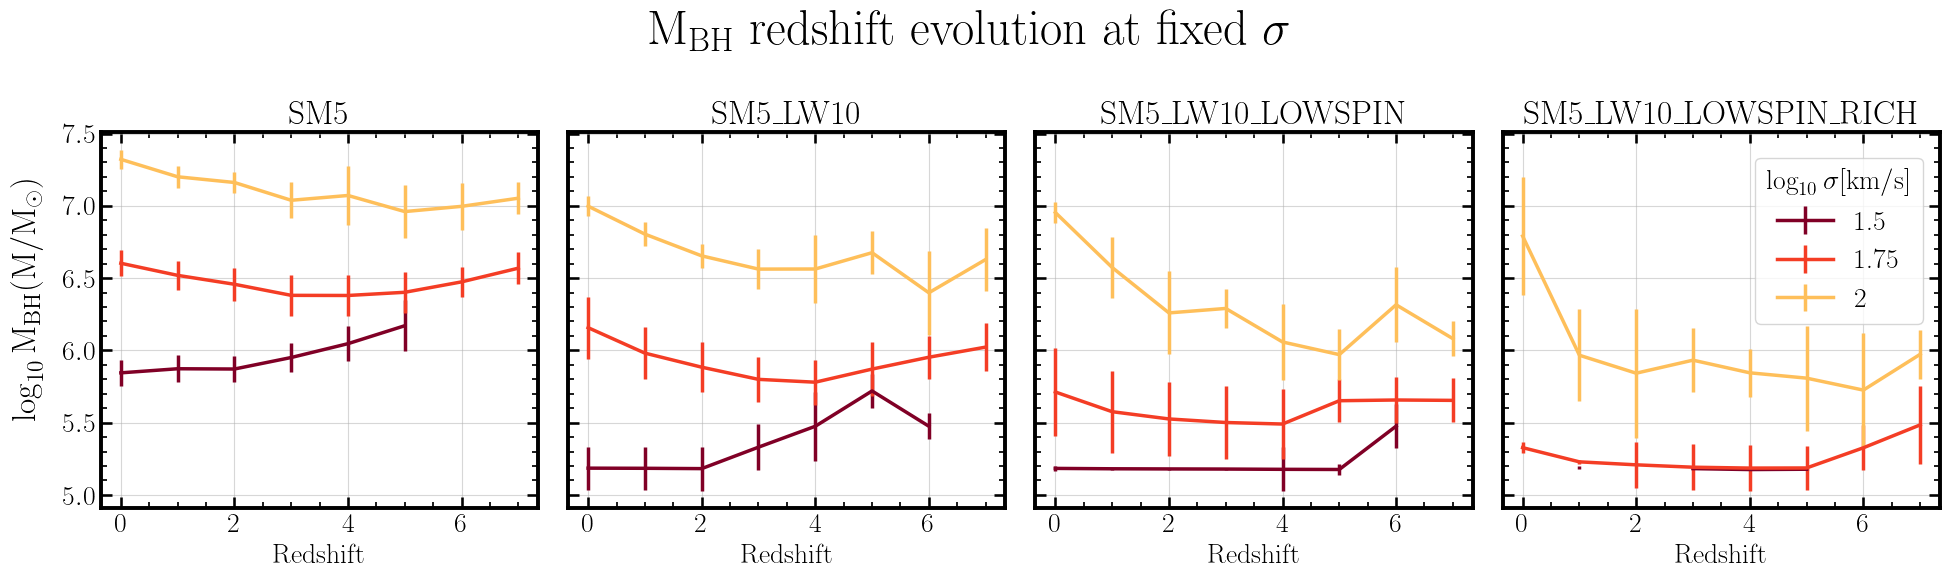

In [41]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']
cmap = plt.get_cmap('YlOrRd')

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].errorbar(redshifts,msigma_bFOFavgs[i],msigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.5')
        axs[1].errorbar(redshifts,msigma_LW10avgs[i],msigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,msigma_spinavgs[i],msigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,msigma_richavgs[i],msigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 1:
        axs[0].errorbar(redshifts,msigma_bFOFavgs[i],msigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.75')
        axs[1].errorbar(redshifts,msigma_LW10avgs[i],msigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,msigma_spinavgs[i],msigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,msigma_richavgs[i],msigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 2:
        axs[0].errorbar(redshifts,msigma_bFOFavgs[i],msigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '2')
        axs[1].errorbar(redshifts,msigma_LW10avgs[i],msigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,msigma_spinavgs[i],msigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,msigma_richavgs[i],msigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'$\mathrm{\log_{10} M_{BH} (M/M_\odot)}$')
fig.suptitle(r'$\mathrm{M_{BH}}$ redshift evolution at fixed $\sigma$',size=35)
fig.legend(title = r'$\log_{10} \sigma [\mathrm{km/s}]$',loc = (0.9,0.44),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/Paper_Figs/M_Sigma_fixed_sigma.pdf')

## M-Mstar slope plot:

In [11]:
bFOF_mstars = [Mstar_decomp_bFOFz0,Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz2,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz4,
               Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz7]
LW10_mstars = [Mstar_decomp_LW10z0,Mstar_decomp_LW10z1,Mstar_decomp_LW10z2,Mstar_decomp_LW10z3,Mstar_decomp_LW10z4,
              Mstar_decomp_LW10z5,Mstar_decomp_LW10z6,Mstar_decomp_LW10z7]
spin_mstars = [Mstar_decomp_spinz0,Mstar_decomp_spinz1,Mstar_decomp_spinz2,Mstar_decomp_spinz3,Mstar_decomp_spinz4,
              Mstar_decomp_spinz5,Mstar_decomp_spinz6,Mstar_decomp_spinz7]
rich_mstars = [Mstar_decomp_richz0,Mstar_decomp_richz1,Mstar_decomp_richz2,Mstar_decomp_richz3,Mstar_decomp_richz4,
              Mstar_decomp_richz5,Mstar_decomp_richz6,Mstar_decomp_richz7]

bFOF_masses = [MBH_decomp_bFOFz0,MBH_decomp_bFOFz1,MBH_decomp_bFOFz2,MBH_decomp_bFOFz3,MBH_decomp_bFOFz4,MBH_decomp_bFOFz5,
              MBH_decomp_bFOFz6,MBH_decomp_bFOFz7]
LW10_masses = [MBH_decomp_LW10z0,MBH_decomp_LW10z1,MBH_decomp_LW10z2,MBH_decomp_LW10z3,MBH_decomp_LW10z4,MBH_decomp_LW10z5,
              MBH_decomp_LW10z6,MBH_decomp_LW10z7]
spin_masses = [MBH_decomp_spinz0,MBH_decomp_spinz1,MBH_decomp_spinz2,MBH_decomp_spinz3,MBH_decomp_spinz4,MBH_decomp_spinz5,
              MBH_decomp_spinz6,MBH_decomp_spinz7]
rich_masses = [MBH_decomp_richz0,MBH_decomp_richz1,MBH_decomp_richz2,MBH_decomp_richz3,MBH_decomp_richz4,MBH_decomp_richz5,
              MBH_decomp_richz6,MBH_decomp_richz7]

# List of mstars
Prop1list=[bFOF_mstars,LW10_mstars,spin_mstars,rich_mstars]

# List of BH Masses
Prop2list=[bFOF_masses,LW10_masses,spin_masses,rich_masses]

redshifts=np.arange(8)

In [12]:
def calc_slope(xdata,ydata):
    
    model = LinearRegression()
    no_nans = (~np.isnan(ydata))
    if len(ydata[no_nans]) == 0:
        return(np.nan)
    model.fit(xdata.reshape(-1,1)[no_nans], ydata[no_nans])
    
    return(model.coef_[0])

All_slopes = []
All_cints = []

for i in range(len(Prop1list)):

    Box_Slopes = []
    Box_cints = []
    
    for ii in range(len(redshifts)):

        xdata = np.log10(Prop1list[i][ii])
        ydata = np.log10(Prop2list[i][ii])

        mass_mask = ydata > np.log10(5*1.5e5) # At least 5 times seed mass
        xdata=xdata[mass_mask]
        ydata=ydata[mass_mask]
        
        slope = calc_slope(xdata,ydata)

        # Bootstrapping our slope calculation
        n_bootstrap = 10000
        n = len(xdata)
        bootstrap_indices = np.random.randint(0, n, size=(n_bootstrap, n))

        slope_samples = np.array([calc_slope(xdata[idx], ydata[idx]) for idx in bootstrap_indices])
        slope_samples = slope_samples[~np.isnan(slope_samples)]
        # print("Length of slope samples:",len(slope_samples))
        
        # Confidence interval
        ci_lower = np.percentile(slope_samples, 2.5)
        ci_upper = np.percentile(slope_samples, 97.5)

        # Adjusted to tell plt.errorbar where to place errors
        c_int = (slope-ci_lower,ci_upper-slope)
        
        Box_Slopes.append(slope)
        Box_cints.append(c_int)

    All_slopes.append(Box_Slopes)
    All_cints.append(Box_cints)

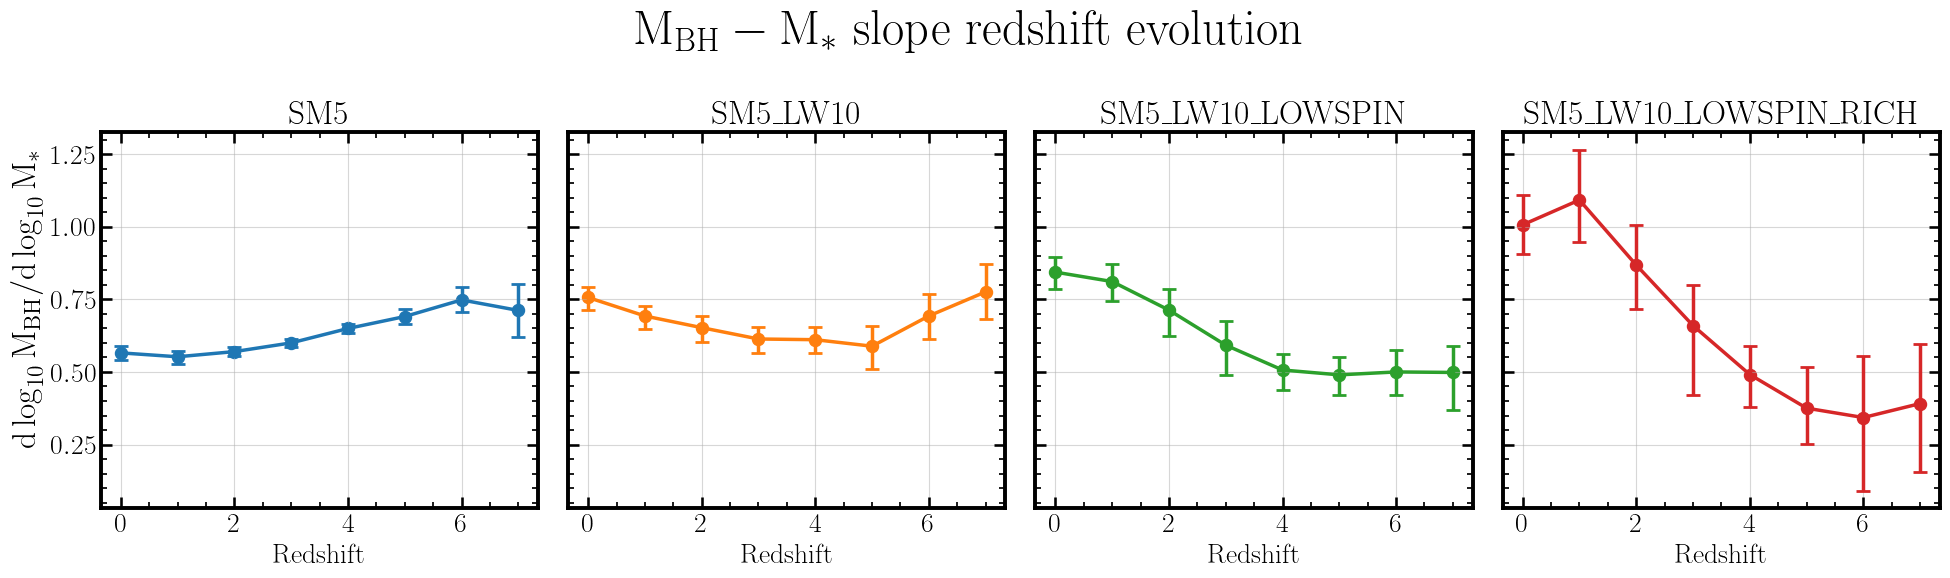

In [39]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

axs[0].scatter(redshifts,All_slopes[0],color='#1f77b4',s=75)
axs[0].errorbar(redshifts,All_slopes[0],(np.array(All_cints[0])[:,0],np.array(All_cints[0])[:,1]),color='#1f77b4',lw=2.5,capsize=5,capthick=2)
axs[1].scatter(redshifts,All_slopes[1],color='#ff7f0e',s=75)
axs[1].errorbar(redshifts,All_slopes[1],(np.array(All_cints[1])[:,0],np.array(All_cints[1])[:,1]),color='#ff7f0e',lw=2.5,capsize=5,capthick=2)
axs[2].scatter(redshifts,All_slopes[2],color='#2ca02c',s=75)
axs[2].errorbar(redshifts,All_slopes[2],(np.array(All_cints[2])[:,0],np.array(All_cints[2])[:,1]),color='#2ca02c',lw=2.5,capsize=5,capthick=2)
axs[3].scatter(redshifts,All_slopes[3],color='#d62728',s=75)
axs[3].errorbar(redshifts,All_slopes[3],(np.array(All_cints[3])[:,0],np.array(All_cints[3])[:,1]),color='#d62728',lw=2.5,capsize=5,capthick=2)

for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'$\mathrm{d\log_{10} M_{BH}/d\log_{10}M_* }$')
fig.suptitle(r'$\mathrm{M_{BH}-M_*}$ slope redshift evolution',size=35)

fig.tight_layout()

fig.savefig('Plots/Paper_Figs/M_Mstar_slope_massmasked4.pdf')

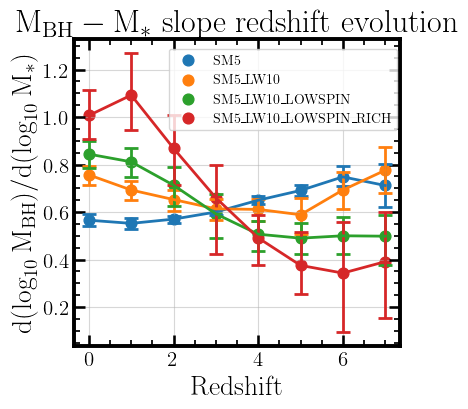

In [37]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,ax = plt.subplots(1,1,figsize = (4.5,4.5),sharey=True)

ax.scatter(redshifts,All_slopes[0],color='#1f77b4',s=60,label = titles[0])
ax.errorbar(redshifts,All_slopes[0],(np.array(All_cints[0])[:,0],np.array(All_cints[0])[:,1]),color='#1f77b4',lw=2,capsize=5,capthick=2)
ax.scatter(redshifts,All_slopes[1],color='#ff7f0e',s=60,label = titles[1])
ax.errorbar(redshifts,All_slopes[1],(np.array(All_cints[1])[:,0],np.array(All_cints[1])[:,1]),color='#ff7f0e',lw=2,capsize=5,capthick=2)
ax.scatter(redshifts,All_slopes[2],color='#2ca02c',s=60,label = titles[2])
ax.errorbar(redshifts,All_slopes[2],(np.array(All_cints[2])[:,0],np.array(All_cints[2])[:,1]),color='#2ca02c',lw=2,capsize=5,capthick=2)
ax.scatter(redshifts,All_slopes[3],color='#d62728',s=60,label = titles[3])
ax.errorbar(redshifts,All_slopes[3],(np.array(All_cints[3])[:,0],np.array(All_cints[3])[:,1]),color='#d62728',lw=2,capsize=5,capthick=2)

ax.grid(alpha=0.5)
ax.set_title(r'$\mathrm{M_{BH}-M_*}$ slope redshift evolution',size=23)
ax.set_ylabel(r'$\mathrm{d(\log_{10} M_{BH})/d(\log_{10}M_*)}$',size=20)
ax.set_xlabel('Redshift',size=20)
ax.tick_params(axis='both', which='major', labelsize=15)

fig.legend(fontsize=10,loc=(0.36,0.68))

fig.tight_layout()
fig.savefig('Plots/Paper_Figs/M_Mstar_slope_massmasked.pdf',bbox_inches='tight')

## Mstar-sigma:

In [13]:
sigmas = [1.5,1.75,2]
bin_width = 0.05

bFOF_sigmas = [Sigma_bulge_bFOFz0,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz3,Sigma_bulge_bFOFz4,
               Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz7]
bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
bFOF_mstars = [Mstar_decomp_bFOFz0,Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz2,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz4,
               Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz7]
bFOF_mstars=[np.log10(i) for i in bFOF_mstars]

LW10_sigmas = [Sigma_bulge_LW10z0,Sigma_bulge_LW10z1,Sigma_bulge_LW10z2,Sigma_bulge_LW10z3,Sigma_bulge_LW10z4,
               Sigma_bulge_LW10z5,Sigma_bulge_LW10z6,Sigma_bulge_LW10z7]
LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
LW10_mstars = [Mstar_decomp_LW10z0,Mstar_decomp_LW10z1,Mstar_decomp_LW10z2,Mstar_decomp_LW10z3,Mstar_decomp_LW10z4,
              Mstar_decomp_LW10z5,Mstar_decomp_LW10z6,Mstar_decomp_LW10z7]
LW10_mstars=[np.log10(i) for i in LW10_mstars]

spin_sigmas = [Sigma_bulge_spinz0,Sigma_bulge_spinz1,Sigma_bulge_spinz2,Sigma_bulge_spinz3,Sigma_bulge_spinz4,
               Sigma_bulge_spinz5,Sigma_bulge_spinz6,Sigma_bulge_spinz7]
spin_sigmas=[np.log10(i) for i in spin_sigmas]
spin_mstars = [Mstar_decomp_spinz0,Mstar_decomp_spinz1,Mstar_decomp_spinz2,Mstar_decomp_spinz3,Mstar_decomp_spinz4,
              Mstar_decomp_spinz5,Mstar_decomp_spinz6,Mstar_decomp_spinz7]
spin_mstars=[np.log10(i) for i in spin_mstars]

rich_sigmas = [Sigma_bulge_richz0,Sigma_bulge_richz1,Sigma_bulge_richz2,Sigma_bulge_richz3,Sigma_bulge_richz4,
               Sigma_bulge_richz5,Sigma_bulge_richz6,Sigma_bulge_richz7]
rich_sigmas=[np.log10(i) for i in rich_sigmas]
rich_mstars = [Mstar_decomp_richz0,Mstar_decomp_richz1,Mstar_decomp_richz2,Mstar_decomp_richz3,Mstar_decomp_richz4,
              Mstar_decomp_richz5,Mstar_decomp_richz6,Mstar_decomp_richz7]
rich_mstars=[np.log10(i) for i in rich_mstars]

mstarsigma_bFOFavgs,mstarsigma_bFOFiqrs,mstarsigma_bFOF_cints = fixed_x(bFOF_sigmas,bFOF_mstars,sigmas,bin_width)
mstarsigma_LW10avgs,mstarsigma_LW10iqrs,mstarsigma_LW10_cints = fixed_x(LW10_sigmas,LW10_mstars,sigmas,bin_width)
mstarsigma_spinavgs,mstarsigma_spiniqrs,mstarsigma_spin_cints = fixed_x(spin_sigmas,spin_mstars,sigmas,bin_width)
mstarsigma_richavgs,mstarsigma_richiqrs,mstarsigma_rich_cints = fixed_x(rich_sigmas,rich_mstars,sigmas,bin_width)

/tmp/ipykernel_569505/3475443081.py:6: RuntimeWarning: divide by zero encountered in log10
  bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
/tmp/ipykernel_569505/3475443081.py:13: RuntimeWarning: divide by zero encountered in log10
  LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
/tmp/ipykernel_569505/3475443081.py:20: RuntimeWarning: divide by zero encountered in log10
  spin_sigmas=[np.log10(i) for i in spin_sigmas]
/tmp/ipykernel_569505/3475443081.py:27: RuntimeWarning: divide by zero encountered in log10
  rich_sigmas=[np.log10(i) for i in rich_sigmas]


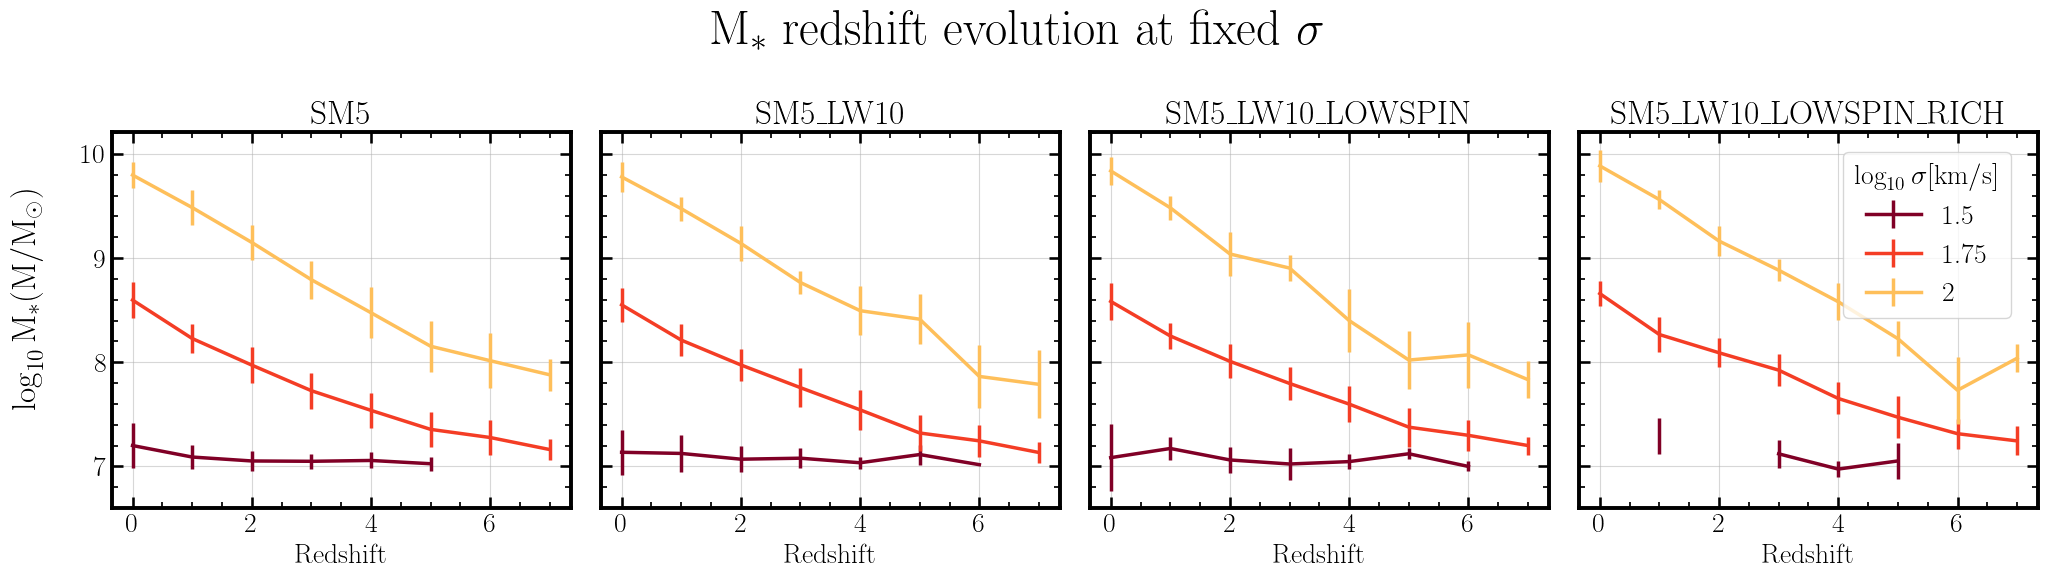

In [16]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']
cmap = plt.get_cmap('YlOrRd')
sigmas = [1.5,1.75,2]

fig,axs = plt.subplots(1,4,figsize = (21,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].errorbar(redshifts,mstarsigma_bFOFavgs[i],mstarsigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.5')
        axs[1].errorbar(redshifts,mstarsigma_LW10avgs[i],mstarsigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,mstarsigma_spinavgs[i],mstarsigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,mstarsigma_richavgs[i],mstarsigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 1:
        axs[0].errorbar(redshifts,mstarsigma_bFOFavgs[i],mstarsigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.75')
        axs[1].errorbar(redshifts,mstarsigma_LW10avgs[i],mstarsigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,mstarsigma_spinavgs[i],mstarsigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,mstarsigma_richavgs[i],mstarsigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 2:
        axs[0].errorbar(redshifts,mstarsigma_bFOFavgs[i],mstarsigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '2')
        axs[1].errorbar(redshifts,mstarsigma_LW10avgs[i],mstarsigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,mstarsigma_spinavgs[i],mstarsigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,mstarsigma_richavgs[i],mstarsigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'$\mathrm{\log_{10} M_{*} (M/M_\odot)}$')
fig.suptitle(r'$\mathrm{M_*}$ redshift evolution at fixed $\sigma$',size=35)
fig.legend(title = r'$\mathrm{\log_{10} \sigma [km/s]}$',loc = (0.9,0.45),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/Mstar_sigma_fixed_sigma.pdf', bbox_inches='tight')

Making a reduced version with just SM5 and SM5_LW10_spin_rich, since the trend is the same in all four plots

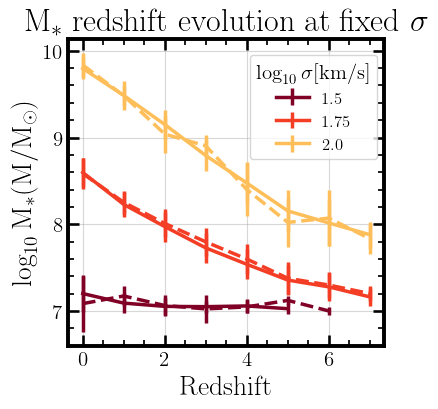

In [39]:
fig,ax = plt.subplots(1,1,figsize=(4.5,4.5))
cmap = plt.get_cmap('YlOrRd')
sigmas = [1.5,1.75,2]
redshifts = np.arange(0,8)

labels = ['1.5','1.75','2.0']

for i in range(len(sigmas)):
    ax.errorbar(redshifts,mstarsigma_bFOFavgs[i],mstarsigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = labels[i])
    ax.errorbar(redshifts,mstarsigma_spinavgs[i],mstarsigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,ls='--')

ax.set_ylabel(r'$\mathrm{\log_{10} M_{*} (M/M_\odot)}$')
ax.set_xlabel('Redshift')
ax.set_title(r'$\mathrm{M_*}$ redshift evolution at fixed $\sigma$',size=23)
ax.grid(alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=15)

fig.legend(title = r'$\mathrm{\log_{10} \sigma [km/s]}$',loc = (0.57,0.61),prop={'size': 12},title_fontsize=15)
fig.tight_layout()

fig.savefig('Plots/Paper_Figs/SM5_spin_Mstar_sigma_fixed_sigma.pdf', bbox_inches='tight')

## HMR plot

In [43]:
HMR_z0 = np.array(bFOF_decomp_z0[10])
HMR_z1 = np.array(bFOF_decomp_z1[10])
HMR_z2 = np.array(bFOF_decomp_z2[10])
HMR_z3 = np.array(bFOF_decomp_z3[10])
HMR_z4 = np.array(bFOF_decomp_z4[10])
HMR_z5 = np.array(bFOF_decomp_z5[10])
HMR_z6 = np.array(bFOF_decomp_z6[10])
HMR_z7 = np.array(bFOF_decomp_z7[10])

In [44]:
mstars = [7,8,9]
bin_width = 0.1

bFOF_mstars = [np.log10(Mstar_decomp_bFOFz0),np.log10(Mstar_decomp_bFOFz1),np.log10(Mstar_decomp_bFOFz2),np.log10(Mstar_decomp_bFOFz3),
                np.log10(Mstar_decomp_bFOFz4),np.log10(Mstar_decomp_bFOFz5),np.log10(Mstar_decomp_bFOFz6),np.log10(Mstar_decomp_bFOFz7)]
bFOF_HMRs = [bFOF_HMR_z0,bFOF_HMR_z1,bFOF_HMR_z2,bFOF_HMR_z3,bFOF_HMR_z4,bFOF_HMR_z5,bFOF_HMR_z6,bFOF_HMR_z7]

avgs,iqrs = fixed_x(bFOF_mstars,bFOF_HMRs,mstars,bin_width)

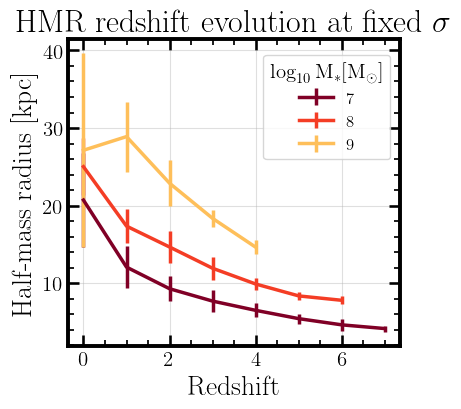

In [45]:
redshifts=[0,1,2,3,4,5,6,7]
labels = [7,8,9]
cmap = plt.get_cmap('YlOrRd')

fig,ax = plt.subplots(1,1,figsize = (4.5,4.5))

for i in range(3):
    ax.errorbar(redshifts,avgs[i],iqrs[i],label=labels[i],color = cmap(1 - i*(1/3)),lw=2.5)
 
fig.legend(title=r'$\mathrm{\log_{10} M_* [M_\odot]}$',loc = (0.57,0.61),prop={'size': 12},title_fontsize=15)
ax.set_ylabel(r'Half-mass radius [kpc]')
ax.set_xlabel(r'Redshift')
ax.set_title(r'HMR redshift evolution at fixed $\sigma$',size=23)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(alpha=0.4)
fig.tight_layout()

fig.savefig('Plots/Paper_Figs/SM5_HMR_redshift_evol.pdf',bbox_inches='tight')

## Scatter vs redshift

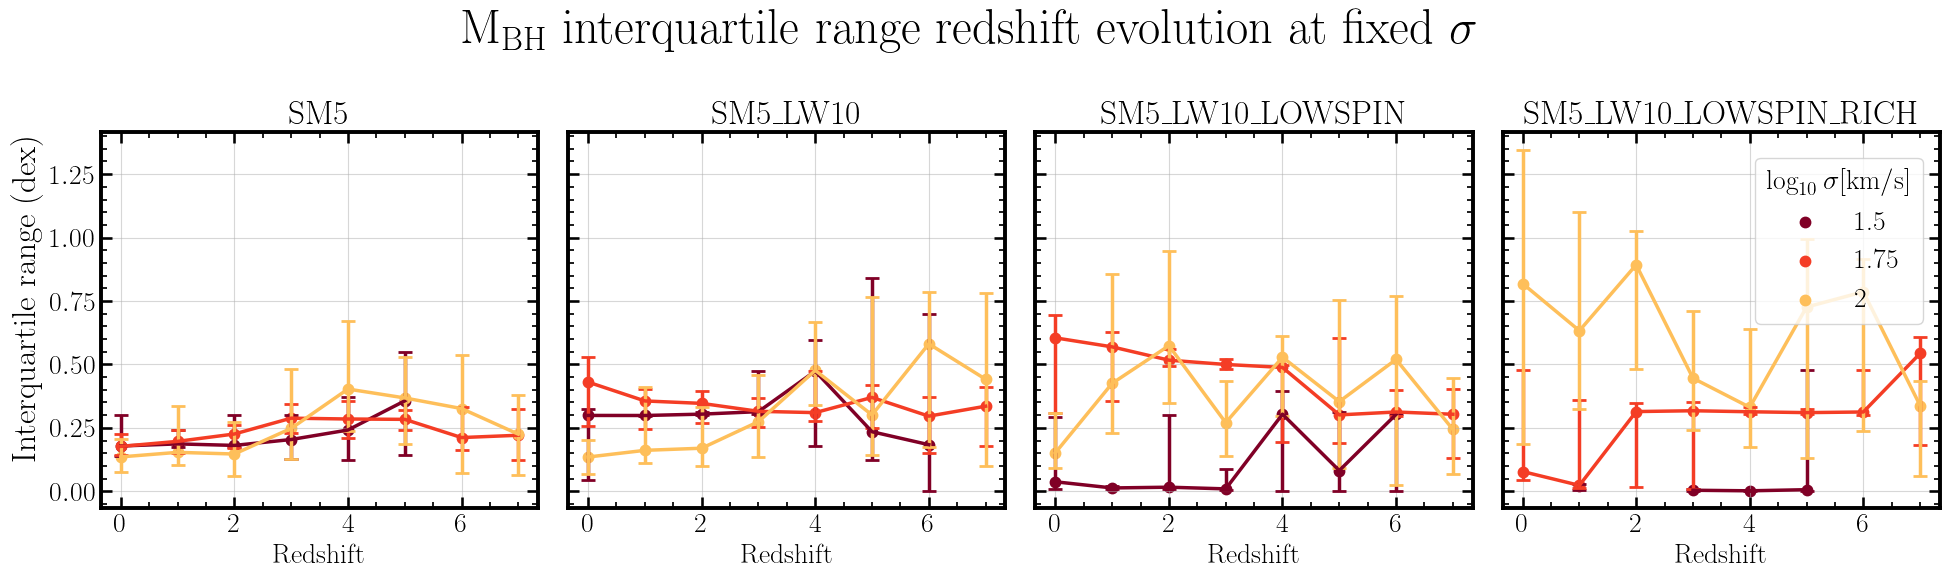

In [11]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']
cmap = plt.get_cmap('YlOrRd')

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].scatter(redshifts,2*msigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.5')
        axs[1].scatter(redshifts,2*msigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].scatter(redshifts,2*msigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].scatter(redshifts,2*msigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[0].errorbar(redshifts,2*msigma_bFOFiqrs[i],[np.array(msigma_bFOF_cints[i])[:,0],np.array(msigma_bFOF_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)        
        axs[1].errorbar(redshifts,2*msigma_LW10iqrs[i],[np.array(msigma_LW10_cints[i])[:,0],np.array(msigma_LW10_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[2].errorbar(redshifts,2*msigma_spiniqrs[i],[np.array(msigma_spin_cints[i])[:,0],np.array(msigma_spin_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[3].errorbar(redshifts,2*msigma_richiqrs[i],[np.array(msigma_rich_cints[i])[:,0],np.array(msigma_rich_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
    elif i == 1:
        axs[0].scatter(redshifts,2*msigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.75')
        axs[1].scatter(redshifts,2*msigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].scatter(redshifts,2*msigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].scatter(redshifts,2*msigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[0].errorbar(redshifts,2*msigma_bFOFiqrs[i],[np.array(msigma_bFOF_cints[i])[:,0],np.array(msigma_bFOF_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)        
        axs[1].errorbar(redshifts,2*msigma_LW10iqrs[i],[np.array(msigma_LW10_cints[i])[:,0],np.array(msigma_LW10_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[2].errorbar(redshifts,2*msigma_spiniqrs[i],[np.array(msigma_spin_cints[i])[:,0],np.array(msigma_spin_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[3].errorbar(redshifts,2*msigma_richiqrs[i],[np.array(msigma_rich_cints[i])[:,0],np.array(msigma_rich_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)  
    elif i == 2:
        axs[0].scatter(redshifts,2*msigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '2')
        axs[1].scatter(redshifts,2*msigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].scatter(redshifts,2*msigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].scatter(redshifts,2*msigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[0].errorbar(redshifts,2*msigma_bFOFiqrs[i],[np.array(msigma_bFOF_cints[i])[:,0],np.array(msigma_bFOF_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)        
        axs[1].errorbar(redshifts,2*msigma_LW10iqrs[i],[np.array(msigma_LW10_cints[i])[:,0],np.array(msigma_LW10_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[2].errorbar(redshifts,2*msigma_spiniqrs[i],[np.array(msigma_spin_cints[i])[:,0],np.array(msigma_spin_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[3].errorbar(redshifts,2*msigma_richiqrs[i],[np.array(msigma_rich_cints[i])[:,0],np.array(msigma_rich_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)  
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'Interquartile range (dex)')
fig.suptitle(r'$\mathrm{M_{BH}}$ interquartile range redshift evolution at fixed $\sigma$',size=35)
fig.legend(title = r'$\log_{10} \sigma [\mathrm{km/s}]$',loc = (0.9,0.44),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/Paper_Figs/M_Sigma_iqr_errors.pdf')

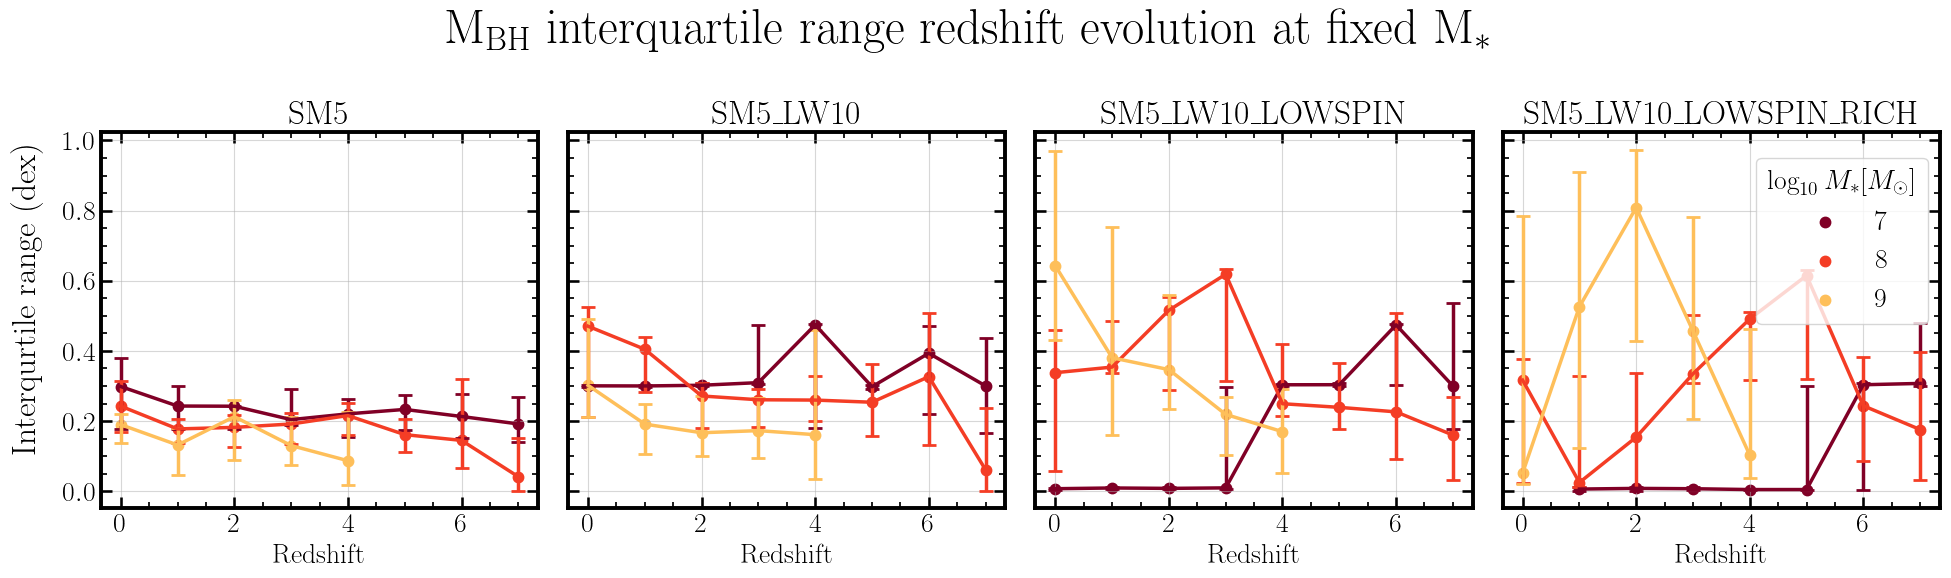

In [12]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']
cmap = plt.get_cmap('YlOrRd')

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].scatter(redshifts,2*mmstar_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '7')
        axs[1].scatter(redshifts,2*mmstar_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].scatter(redshifts,2*mmstar_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].scatter(redshifts,2*mmstar_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[0].errorbar(redshifts,2*mmstar_bFOFiqrs[i],[np.array(mmstar_bFOF_cints[i])[:,0],np.array(mmstar_bFOF_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)        
        axs[1].errorbar(redshifts,2*mmstar_LW10iqrs[i],[np.array(mmstar_LW10_cints[i])[:,0],np.array(mmstar_LW10_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[2].errorbar(redshifts,2*mmstar_spiniqrs[i],[np.array(mmstar_spin_cints[i])[:,0],np.array(mmstar_spin_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[3].errorbar(redshifts,2*mmstar_richiqrs[i],[np.array(mmstar_rich_cints[i])[:,0],np.array(mmstar_rich_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)
    elif i == 1:
        axs[0].scatter(redshifts,2*mmstar_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '8')
        axs[1].scatter(redshifts,2*mmstar_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].scatter(redshifts,2*mmstar_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].scatter(redshifts,2*mmstar_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[0].errorbar(redshifts,2*mmstar_bFOFiqrs[i],[np.array(mmstar_bFOF_cints[i])[:,0],np.array(mmstar_bFOF_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)        
        axs[1].errorbar(redshifts,2*mmstar_LW10iqrs[i],[np.array(mmstar_LW10_cints[i])[:,0],np.array(mmstar_LW10_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[2].errorbar(redshifts,2*mmstar_spiniqrs[i],[np.array(mmstar_spin_cints[i])[:,0],np.array(mmstar_spin_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[3].errorbar(redshifts,2*mmstar_richiqrs[i],[np.array(mmstar_rich_cints[i])[:,0],np.array(mmstar_rich_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)
    elif i == 2:
        axs[0].scatter(redshifts,2*mmstar_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '9')
        axs[1].scatter(redshifts,2*mmstar_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].scatter(redshifts,2*mmstar_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].scatter(redshifts,2*mmstar_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[0].errorbar(redshifts,2*mmstar_bFOFiqrs[i],[np.array(mmstar_bFOF_cints[i])[:,0],np.array(mmstar_bFOF_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)        
        axs[1].errorbar(redshifts,2*mmstar_LW10iqrs[i],[np.array(mmstar_LW10_cints[i])[:,0],np.array(mmstar_LW10_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[2].errorbar(redshifts,2*mmstar_spiniqrs[i],[np.array(mmstar_spin_cints[i])[:,0],np.array(mmstar_spin_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[3].errorbar(redshifts,2*mmstar_richiqrs[i],[np.array(mmstar_rich_cints[i])[:,0],np.array(mmstar_rich_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'Interqurtile range (dex)')
fig.suptitle(r'$\mathrm{M_{BH}}$ interquartile range redshift evolution at fixed $\mathrm{M_*}$',size=35)
fig.legend(title = r'$\log_{10} M_* [M_\odot]$',loc = (0.9,0.44),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/Paper_Figs/M_Mstar_iqr_errors.pdf')

# M-Sigma comparison plot

In [33]:
# List of sigmas
Prop1list=[[Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz0],[Sigma_bulge_LW10z5,Sigma_bulge_LW10z0],
           [Sigma_bulge_spinz5,Sigma_bulge_spinz0],[Sigma_bulge_richz5,Sigma_bulge_richz0]]

# List of BH Masses
Prop2list=[[MBH_decomp_bFOFz5,MBH_decomp_bFOFz0],[MBH_decomp_LW10z5,MBH_decomp_LW10z0],
           [MBH_decomp_spinz5,MBH_decomp_spinz0],[MBH_decomp_richz5,MBH_decomp_richz0]]

# Limits for making plot in log space
limits=[1.2,2.6]
redshifts=[5,0]

AllBoxMedians,AllBoxIQRs,Xpoints = median_trends(Prop1list,Prop2list,redshifts,limits,bins=10)

/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:73: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:74: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]


In [34]:
# Binning as above for Illustris and Illustris TNG
IllProp1 = [[Ill_z5_sigmas,Ill_z0_sigmas],[TNG_z5_sigmas,TNG_z0_sigmas]]
IllProp2 = [[Ill_z5_BHs,Ill_z0_BHs],[TNG_z5_BHs,TNG_z0_BHs]]

redshiftIll = [5,0]

Ill_TNG_medians,Ill_TNG_IQRs,ILL_TNG_Xpoints = median_trends(IllProp1,IllProp2,redshiftIll,limits,bins=10)

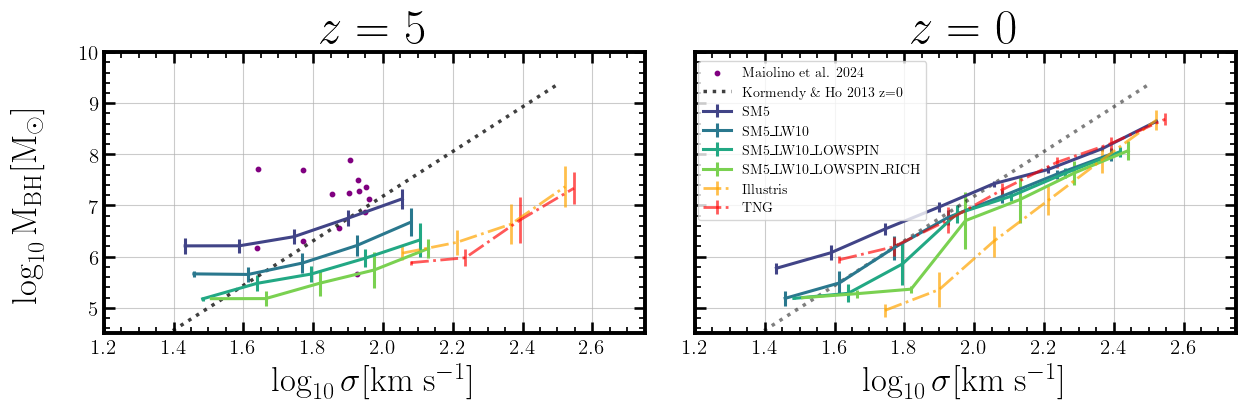

In [35]:
legend_names = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']
axislabels = [r'$\mathrm{\log_{10}\sigma [km\ s^{-1}]}$',r'$\mathrm{\log_{10}M_{BH} [M_{\odot}]}$']
tick_size=15
label_font_size=25
cmap = plt.get_cmap('viridis') # Choose uniform luminosity cmap

f,axes = plt.subplots(1,2,figsize=(13,4.5),sharey=True,sharex=True)

for i in range(AllBoxMedians.shape[0]):
        for ii in range(len(redshifts)):
            
            if ii == 0:
                # There is probably a better solution to this, but I don't want to duplicate labels
                axes[ii].errorbar(Xpoints[i],AllBoxMedians[i,ii,:],yerr = AllBoxIQRs[i,ii,:],
                                  label=legend_names[i],color = cmap(0.2+i*(0.8/AllBoxMedians.shape[0])),lw=2.2)
            else:
                axes[ii].errorbar(Xpoints[i],AllBoxMedians[i,ii,:],yerr = AllBoxIQRs[i,ii,:],
                                  color = cmap(0.2+i*(0.8/AllBoxMedians.shape[0])),lw=2.2)

# Change the alpha and colors to make everything visible

axes.flat[0].scatter(Maiolino_x,Maiolino_y,label='Maiolino et al. 2024',color='purple',s=10) 

# Index for labeling figure titles
n=0

for ax in axes.flat:
    ax.set_xlim(1.2,2.75)
    ax.set_ylim(4.5,10)
    ax.grid(alpha = 0.65)
    ax.tick_params(labelsize=tick_size)
    ax.set_title(f'$z = {redshifts[n]}$',size = label_font_size+10)
    ax.set_xlabel(f'{axislabels[0]}',fontsize=label_font_size,y=0.06)
    n+=1
    
    if ax==axes.flat[0]:
        ax.plot(xfit,KH13_yfit[0],label=r'Kormendy \& Ho 2013 z=0',ls='dotted',lw=2.5,alpha=0.75,color='black')
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_medians[0][0],Ill_TNG_IQRs[0][0],
                      lw=2,ls='dashdot',color='orange',alpha=0.7)
        ax.errorbar(ILL_TNG_Xpoints[1],Ill_TNG_medians[1][0],Ill_TNG_IQRs[1][0],
                      lw=2,ls='dashdot',color='red',alpha=0.65)
    else: 
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_medians[0][1],Ill_TNG_IQRs[0][1],
                      label='Illustris',lw=2,ls='dashdot',color='orange',alpha=0.7)
        ax.errorbar(ILL_TNG_Xpoints[1],Ill_TNG_medians[1][1],Ill_TNG_IQRs[1][1],
                      label='TNG',lw=2,ls='dashdot',color='red',alpha=0.65)
        ax.plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.5,color='black')
        
f.supylabel(f'{axislabels[1]}',fontsize=label_font_size,x=0.02)
f.legend(fontsize = 10,loc=[0.56,0.46])

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

plt.savefig('Plots/Paper_Figs/Brahma_M_Sigma_binned.pdf', bbox_inches='tight')

Note that the Illustris and IllustrisTNG relations are shifted to higher BH mass and sigma, especially at z=5, because we have only selected those subhalos with more than 1000 stars. 

# Quantitative explanation of $M_{BH}-\sigma$ redshift evolution

Relevant equations:

$$M_{BH} = M_{BH}(M_*(z),\sigma(z))$$

$$\frac{dM_{BH}}{dz} = \frac{\partial M_{BH}}{\partial M_*}\frac{\partial M_*}{\partial z} + \frac{\partial M_{BH}}{\partial \sigma}\frac{\partial \sigma}{\partial z}$$

$$ \frac{dM_{BH}}{dz}\biggr|_\sigma = \frac{\partial M_{BH}}{\partial M_*}\frac{\partial M_*}{\partial z}\biggr|_\sigma $$

In [16]:
All_avgs = [msigma_bFOFavgs,msigma_LW10avgs,msigma_spinavgs,msigma_richavgs]
mstar_sigma_avgs = [mstarsigma_bFOFavgs,mstarsigma_LW10avgs,mstarsigma_spinavgs,mstarsigma_richavgs]
dmbh_dz = []
dmstar_dzs = []
rhs = [] # right hand side of equation

for i in range(3): # For each sigma calculated
    
    dmstardz_sigma = []
    dmbh_dz_sigma = []
    rhs_sigma = []

    for ii in range(4): # For each box

        dmstardz_sigma_box = []
        dmbh_dz_sigma_box = []
        rhs_sigma_box = []
        avgs = All_avgs[ii][i]
        mstarsigma_avg = mstar_sigma_avgs[ii][i]
    
        for iii in range(1,7): # For redshifts 1-6

            # Compute very simple d/dz's
            dmbh_dz_sigma_z = (avgs[iii-1] - avgs[iii+1])/2
            dmstardz = (mstarsigma_avg[iii-1] - mstarsigma_avg[iii+1])/2
            rhs_sigma_z = dmstardz*All_slopes[ii][iii]

            dmstardz_sigma_box.append(dmstardz)
            dmbh_dz_sigma_box.append(dmbh_dz_sigma_z)
            rhs_sigma_box.append(rhs_sigma_z)

        dmstardz_sigma.append(dmstardz_sigma_box)
        dmbh_dz_sigma.append(dmbh_dz_sigma_box)
        rhs_sigma.append(rhs_sigma_box)

    dmstar_dzs.append(dmstardz_sigma)
    dmbh_dz.append(dmbh_dz_sigma)
    rhs.append(rhs_sigma)

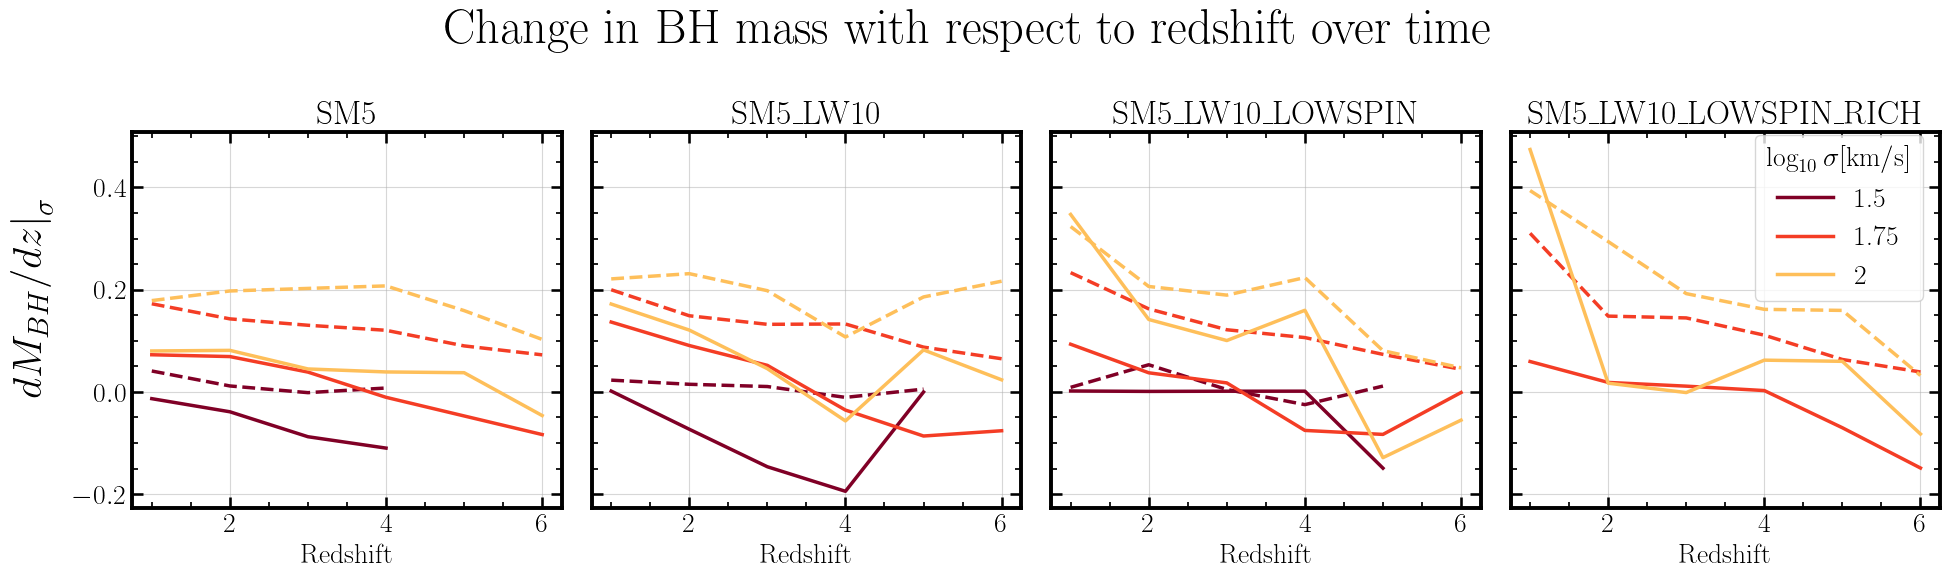

In [26]:
redshifts=np.arange(1,7)
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']
cmap = plt.get_cmap('YlOrRd')

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].plot(redshifts,dmbh_dz[i][0],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.5')
        axs[1].plot(redshifts,dmbh_dz[i][1],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].plot(redshifts,dmbh_dz[i][2],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].plot(redshifts,dmbh_dz[i][3],color = cmap(1 - i*(1/3)),lw=2.5)

        axs[0].plot(redshifts,rhs[i][0],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        axs[1].plot(redshifts,rhs[i][1],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        axs[2].plot(redshifts,rhs[i][2],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        axs[3].plot(redshifts,rhs[i][3],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        
    elif i == 1:
        axs[0].plot(redshifts,dmbh_dz[i][0],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.75')
        axs[1].plot(redshifts,dmbh_dz[i][1],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].plot(redshifts,dmbh_dz[i][2],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].plot(redshifts,dmbh_dz[i][3],color = cmap(1 - i*(1/3)),lw=2.5)

        axs[0].plot(redshifts,rhs[i][0],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        axs[1].plot(redshifts,rhs[i][1],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        axs[2].plot(redshifts,rhs[i][2],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        axs[3].plot(redshifts,rhs[i][3],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
    elif i == 2:
        axs[0].plot(redshifts,dmbh_dz[i][0],color = cmap(1 - i*(1/3)),lw=2.5,label = '2')
        axs[1].plot(redshifts,dmbh_dz[i][1],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].plot(redshifts,dmbh_dz[i][2],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].plot(redshifts,dmbh_dz[i][3],color = cmap(1 - i*(1/3)),lw=2.5)

        axs[0].plot(redshifts,rhs[i][0],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        axs[1].plot(redshifts,rhs[i][1],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        axs[2].plot(redshifts,rhs[i][2],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')
        axs[3].plot(redshifts,rhs[i][3],color = cmap(1 - i*(1/3)),lw=2.5,ls = '--')

for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.legend(title = r'$\log_{10} \sigma [\mathrm{km/s}]$',loc = (0.9,0.48),fontsize=20)
fig.suptitle('Change in BH mass with respect to redshift over time',fontsize=35)
fig.supylabel(r'$dM_{BH}/dz \biggr|_\sigma$',fontsize=30)
fig.tight_layout()
fig.savefig('Plots/Paper_Figs/dM_dz.pdf')

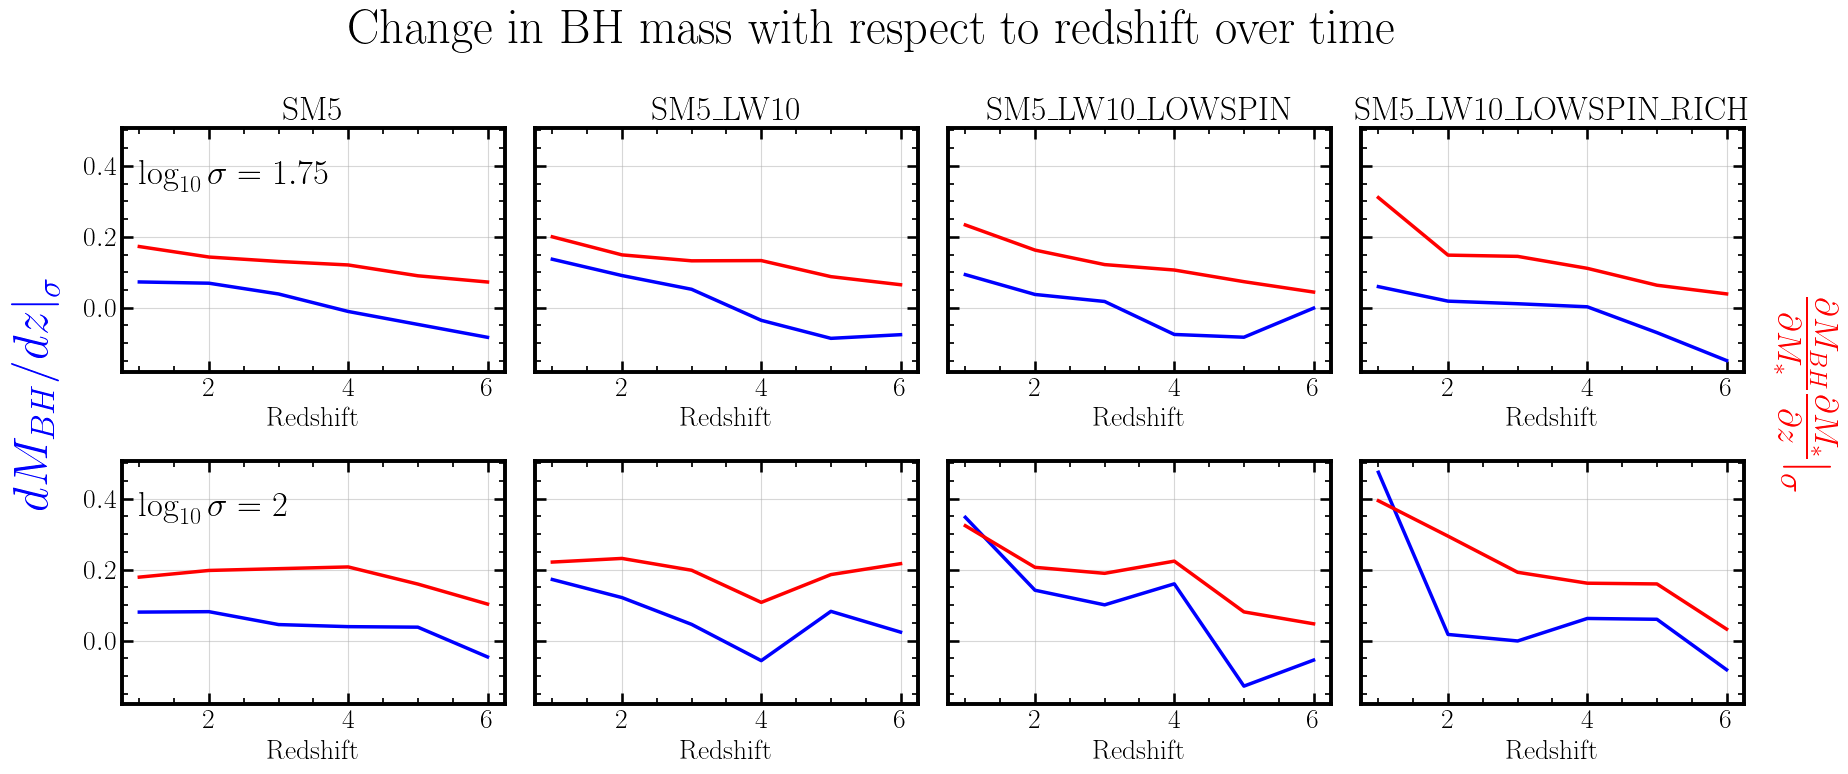

In [65]:
redshifts=np.arange(1,7)
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,axs = plt.subplots(2,4,figsize = (18,8),sharey=True)

for i in range(len(sigmas)):
        
    if i == 1:
        axs[i-1,0].plot(redshifts,dmbh_dz[i][0],color = 'blue',lw=2.5)
        axs[i-1,1].plot(redshifts,dmbh_dz[i][1],color = 'blue',lw=2.5)
        axs[i-1,2].plot(redshifts,dmbh_dz[i][2],color = 'blue',lw=2.5)
        axs[i-1,3].plot(redshifts,dmbh_dz[i][3],color = 'blue',lw=2.5)

        axs[i-1,0].plot(redshifts,rhs[i][0],color = 'red',lw=2.5)
        axs[i-1,1].plot(redshifts,rhs[i][1],color = 'red',lw=2.5)
        axs[i-1,2].plot(redshifts,rhs[i][2],color = 'red',lw=2.5)
        axs[i-1,3].plot(redshifts,rhs[i][3],color = 'red',lw=2.5)
    elif i == 2:
        axs[i-1,0].plot(redshifts,dmbh_dz[i][0],color = 'blue',lw=2.5)
        axs[i-1,1].plot(redshifts,dmbh_dz[i][1],color = 'blue',lw=2.5)
        axs[i-1,2].plot(redshifts,dmbh_dz[i][2],color = 'blue',lw=2.5)
        axs[i-1,3].plot(redshifts,dmbh_dz[i][3],color = 'blue',lw=2.5)

        axs[i-1,0].plot(redshifts,rhs[i][0],color = 'red',lw=2.5)
        axs[i-1,1].plot(redshifts,rhs[i][1],color = 'red',lw=2.5)
        axs[i-1,2].plot(redshifts,rhs[i][2],color = 'red',lw=2.5)
        axs[i-1,3].plot(redshifts,rhs[i][3],color = 'red',lw=2.5)

for i in range(len(axs.flatten())):
    ax = axs.flatten()[i]
    if i < 4:
        ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')

axs[0,0].text(1,0.35,r'$\log_{10}\sigma = 1.75$',fontsize=25)
axs[1,0].text(1,0.35,r'$\log_{10}\sigma = 2$',fontsize=25)
fig.text(1.0, 0.5, r'$\frac{\partial M_{BH}}{\partial M_*}\frac{\partial M_*}{\partial z}\biggr|_\sigma$', va='center', rotation=-90, fontsize=35,color='red')

fig.suptitle('Change in BH mass with respect to redshift over time',fontsize=35)
fig.supylabel(r'$dM_{BH}/dz \biggr|_\sigma$',fontsize=35,color='blue')
fig.tight_layout()
fig.savefig('Plots/Paper_Figs/dM_dz_2rows.pdf',bbox_inches='tight')